# Análise de Preços de Imóveis em São Paulo

# 1 Introdução
Neste projeto, exploramos um conjunto de dados contendo informações sobre os preços de imóveis na cidade de São Paulo. O objetivo desta análise é desenvolver modelos de regressão capazes de prever os preços dos imóveis com base em várias características.

O conjunto de dados inclui uma variedade de recursos, como número de quartos, número de banheiros, tamanho do lote e localização geográfica. A variável alvo que estamos tentando prever é o preço do imóvel.

Para alcançar nosso objetivo, seguiremos as etapas típicas de análise de dados, começando com a exploração e limpeza dos dados, seguida pela engenharia de recursos e modelagem. Avaliaremos o desempenho de vários modelos de regressão, incluindo Regressão Linear, Random Forest Regressor, Gradient Boosting Regressor e RANSAC Regressor, da biblioteca [scikit-learn](https://scikit-learn.org/stable/), para determinar qual modelo oferece as melhores previsões.

Vamos começar carregando e explorando os dados para entender melhor o problema e os padrões subjacentes aos preços dos imóveis em São Paulo. Em seguida, aplicaremos os modelos de regressão mencionados para prever os preços dos imóveis e avaliaremos o desempenho de cada modelo para determinar qual é o mais adequado para este problema específico. 

Você pode encontrar o conjunto de dados original no site do Kaggle, neste link: [House Price Data of Sao Paulo on Kaggle](https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo).

# 2 Coleta de Dados

### 2.1 Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 DataFrame

In [2]:
caminho = r"C:\Users\claud\Desktop\PÓS GRADUAÇÃO\dados\imobiliario\Sao paulo.xlsx"

df = pd.read_excel(caminho)

In [3]:
df

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000
10031,"Rua Manuel Onha, , 514","Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês


# 3 Pré-processamento de Dados

### 3.1 Explorando o DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 0 to 10032
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Street                     10033 non-null  object
 1   City                       10033 non-null  object
 2   propertycard__detailvalue  10033 non-null  object
 3   quartos                    10033 non-null  object
 4   banheiros                  10033 non-null  object
 5   vagas                      10033 non-null  object
 6   price                      10033 non-null  object
dtypes: object(7)
memory usage: 548.8+ KB


In [5]:
df.describe()

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
count,10033,10033,10033,10033,10033,10033,10033
unique,3554,628,827,17,16,29,1043
top,"Jardim Guedala, São Paulo",SP,300,3,3,2,R$ 2.500.000
freq,190,3437,299,4224,1955,2392,182


In [6]:
df.price.value_counts()

price
R$ 2.500.000     182
R$ 3.500.000     174
R$ 1.200.000     170
R$ 1.600.000     151
R$ 1.500.000     150
                ... 
R$ 2.226.000       1
R$ 1.675.000       1
R$ 10.700.000      1
R$ 2.128.000       1
R$ 4.043.000       1
Name: count, Length: 1043, dtype: int64

In [7]:
df.vagas.value_counts()

vagas
2      2392
4      2121
3      1564
6      1070
5       881
1       803
8       435
10      282
7       238
12       67
9        57
14       25
15       25
11       14
20       13
16        9
13        6
30        6
25        5
18        5
26        3
1-2       2
24        2
40        2
50        2
38        1
42        1
34        1
23        1
Name: count, dtype: int64

In [8]:
df.banheiros.value_counts()

banheiros
3      1955
4      1838
2      1644
5      1617
6      1039
1      1038
7       488
8       285
9        62
10       36
11       15
12        8
14        4
40        2
3-6       1
16        1
Name: count, dtype: int64

In [9]:
df.quartos.value_counts()

quartos
3      4224
4      3312
2      1204
5       859
6       217
1       107
7        56
8        20
9        12
10        8
11        6
12        2
16        2
2-3       1
3-6       1
13        1
15        1
Name: count, dtype: int64

In [10]:
df.propertycard__detailvalue.value_counts()

propertycard__detailvalue
300    299
200    288
400    219
250    204
120    192
      ... 
699      1
738      1
916      1
663      1
513      1
Name: count, Length: 827, dtype: int64

### 3.2 Trantando os dados

#### 3.2.1 Renomenando as Colunas

In [11]:
novos_nomes = {
    'Street': 'Rua',
    'City': 'Bairro', 
    'propertycard__detailvalue': 'Área', 
    'quartos': 'Quartos', 
    'banheiros': 'Banheiros', 
    'vagas': 'Vagas', 
    'price': 'Preço'
              }

In [12]:
df = df.rename(columns=novos_nomes)

In [13]:
df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000
10031,"Rua Manuel Onha, , 514","Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês


#### 3.2.2 Rua

In [14]:
df.Rua.value_counts()

Rua
Jardim Guedala, São Paulo        190
Alto de Pinheiros, São Paulo     169
Jardim Paulista, São Paulo       138
Jardim Europa, São Paulo         128
Jardim Leonor, São Paulo         118
                                ... 
Rua Curupaiti                      1
Rua Meteoro                        1
Travessa Lopes Gonçalves           1
Rua Mário Ferreira de Abreu        1
Rua Silveira da Mota               1
Name: count, Length: 3554, dtype: int64

In [15]:
q_ruas = df['Rua'].str.contains('São Paulo').sum()

q_bairro = df['Bairro'].str.contains('SP').sum()

print('São paulo: ', q_ruas, ' e SP: ', q_bairro )

São paulo:  3438  e SP:  3437


In [16]:
# Criando coluna numero da rua
df['Número'] = df['Rua'].str.extract(r',\s?(\d+)')

In [17]:
df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000,255
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000,42
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000,NaN
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000,NaN
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000,195
...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000,NaN
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000,NaN
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000,NaN
10031,"Rua Manuel Onha, , 514","Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês,514


In [18]:
# Transformando os valores NaN por 0
df['Número'].fillna(0, inplace=True)
df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000,255
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000,42
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000,0
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000,0
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000,195
...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000,0
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000,0
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000,0
10031,"Rua Manuel Onha, , 514","Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês,514


In [19]:
df['Número'].value_counts()

Número
0           8676
0            109
50            46
37738888      24
1             17
            ... 
33             1
578            1
569            1
444            1
255            1
Name: count, Length: 496, dtype: int64

In [20]:
df['Número'] = df['Número'].astype(float)

In [21]:
df['Número'] = df['Número'].astype(int)

In [22]:
df['Número'].value_counts(ascending=False)

Número
0           8795
50            46
37738888      24
1             17
100           16
            ... 
1381           1
1536           1
731            1
442            1
255            1
Name: count, Length: 493, dtype: int64

In [23]:
# Substituindo valores negativos por NaN
df['Número'] = df['Número'].apply(lambda x: np.nan if x < 0 else x)

# Substituindo valores muito grandes por NaN
valor_max_esperado = 10000  # definir um valor máximo esperado
df['Número'] = df['Número'].apply(lambda x: np.nan if x > valor_max_esperado else x)

# Transformando os valores NaN por 0:
df['Número'].fillna(0, inplace=True)

In [24]:
df['Número'] = df['Número'].astype(int)

Foi observado que a coluna "Bairro" contém alguns dados apenas com "SP" e não conforme a maioria contendo bairro e cidade como, por exemplo, "Jardim Reimberg, São Paulo". 

Diantes da situação, serão transformadas as ocorrências de "SP" para "(Bairro), (Cidade)".

In [25]:
# Verificando se a coluna "Bairro" contém "SP"
mask = df['Bairro'].str.contains('SP', na=False)

# Substituindo os valores na coluna "Bairro" usando a máscara
df.loc[mask, 'Bairro'] = df.loc[mask, 'Rua']

# Verificar o DataFrame resultante
df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000,255
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000,42
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000,0
3,"Jardim Morumbi, São Paulo","Jardim Morumbi, São Paulo",310,3,2,4,R$ 685.000,0
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000,195
...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000,0
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000,0
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000,0
10031,"Rua Manuel Onha, , 514","Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês,514


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 0 to 10032
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        10033 non-null  object
 1   Bairro     10033 non-null  object
 2   Área       10033 non-null  object
 3   Quartos    10033 non-null  object
 4   Banheiros  10033 non-null  object
 5   Vagas      10033 non-null  object
 6   Preço      10033 non-null  object
 7   Número     10033 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 588.0+ KB


In [27]:
# Mantendo apenas os dados que se referem a rua, eliminando os demais, que estão a esquerda da vírgula
df['Rua'] = df['Rua'].str.split(',').str[0]

df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número
0,Avenida Itacira,"Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000,255
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000,42
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000,0
3,Jardim Morumbi,"Jardim Morumbi, São Paulo",310,3,2,4,R$ 685.000,0
4,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,R$ 540.000,195
...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000,0
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000,0
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000,0
10031,Rua Manuel Onha,"Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês,514


In [28]:
df.Rua.value_counts()

Rua
Jardim Guedala          190
Alto de Pinheiros       169
Jardim Paulista         138
Jardim Europa           128
Jardim Leonor           118
                       ... 
Rua Falchi Gianini        1
Rua Erva Cidreira         1
Alameda Casa Branca       1
Rua Aparaó                1
Avenida Itacira           1
Name: count, Length: 3425, dtype: int64

In [29]:
df.describe()

,Número
count,10033.000000
mean,48.563341
std,268.241958
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6000.000000


#### 3.2.3 Bairro

In [30]:
# Criando coluna "Cidade", extraindo openas os dados da cidade
df['Cidade'] = df['Bairro'].str.split(',').str[-1].str.strip()

df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número,Cidade
0,Avenida Itacira,"Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000,255,São Paulo
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000,42,São Paulo
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000,0,São Paulo
3,Jardim Morumbi,"Jardim Morumbi, São Paulo",310,3,2,4,R$ 685.000,0,São Paulo
4,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,R$ 540.000,195,São Paulo
...,...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,"Vila Sofia, São Paulo",90,2,2,2,R$ 665.000,0,São Paulo
10029,Rua Guararema,"Bosque da Saúde, São Paulo",600,8,7,5,R$ 2.300.000,0,São Paulo
10030,Rua Estero Belaco,"Vila da Saúde, São Paulo",200,3,3,6,R$ 1.050.000,0,São Paulo
10031,Rua Manuel Onha,"Vila Oratório, São Paulo",180,3,2,2,R$ 2.200\n /Mês,514,São Paulo


In [31]:
df.Cidade.value_counts()

Cidade
São Paulo              9983
Brasil                   10
do                        4
74                        3
380                       2
10                        2
Batuá                     1
55                        1
Açu                       1
Noa                       1
acu                       1
Kehir                     1
de                        1
Cotia                     1
Guainumbi                 1
Pindamonhangaba           1
Boituva                   1
Sorocaba                  1
São José dos Campos       1
Jacareí                   1
A                         1
Santana de Parnaíba       1
Guaçu                     1
Name: count, dtype: int64

Observações:
- Fora verificado que existem alguns dados de cidade além de "São Paulo", porém com pouca relevância por haver poucos dados, o que se torna mais viável eliminar as linhas referentes.

In [32]:
# Apagando os demais dados de cidade
cidade = ['São Paulo']
df = df[df['Cidade'].isin(cidade)]

In [33]:
# Verificando a mudança
df.Cidade.value_counts()

Cidade
São Paulo    9983
Name: count, dtype: int64

In [34]:
# Mantendo apenas os nome do bairro e eliminando os demais
df['Bairro'] = df['Bairro'].str.split(',').str[0]

# Verificando o DataFrame resultante
df

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\2131417347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bairro'] = df['Bairro'].str.split(',').str[0]


,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número,Cidade
0,Avenida Itacira,Planalto Paulista,1000,4,8,6,R$ 7.000.000,255,São Paulo
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,469-524,3-6,3-6,4,R$ 3.700.000,42,São Paulo
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,R$ 380.000,0,São Paulo
3,Jardim Morumbi,Jardim Morumbi,310,3,2,4,R$ 685.000,0,São Paulo
4,Rua Tobias Barreto,Mooca,100,3,2,2,R$ 540.000,195,São Paulo
...,...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,Vila Sofia,90,2,2,2,R$ 665.000,0,São Paulo
10029,Rua Guararema,Bosque da Saúde,600,8,7,5,R$ 2.300.000,0,São Paulo
10030,Rua Estero Belaco,Vila da Saúde,200,3,3,6,R$ 1.050.000,0,São Paulo
10031,Rua Manuel Onha,Vila Oratório,180,3,2,2,R$ 2.200\n /Mês,514,São Paulo


In [35]:
df.Bairro.value_counts()

Bairro
 Alto de Pinheiros      240
 Jardim Guedala         213
Jardim Guedala          190
 Brooklin Paulista      172
Alto de Pinheiros       169
                       ... 
 Campininha               1
Jardim Anália Franco      1
 Sítio Represa            1
 Sítio do Mandaqui        1
Chácara Belenzinho        1
Name: count, Length: 999, dtype: int64

In [36]:
# Ajustando a posição dos dados, devido a existência de espaçamentos incorretos
df['Bairro'] = df['Bairro'].str.strip()

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\2497416294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bairro'] = df['Bairro'].str.strip()


In [37]:
df.Bairro.value_counts()

Bairro
Alto de Pinheiros      409
Jardim Guedala         403
Jardim Paulista        305
Brooklin Paulista      247
Jardim Europa          240
                      ... 
Pari                     1
Sítio Represa            1
Vila Sabrina             1
Jardim Reimberg          1
Parque Maria Helena      1
Name: count, Length: 701, dtype: int64

#### 3.2.4 vagas

In [38]:
df.Vagas.value_counts()

Vagas
2     2380
4     2113
3     1564
6     1059
5      878
1      799
8      427
10     281
7      237
12      67
9       57
15      25
14      25
11      14
20      13
16       9
13       6
30       6
25       5
18       5
26       3
24       2
40       2
50       2
38       1
42       1
34       1
23       1
Name: count, dtype: int64

In [39]:
# Transformando a coluna vagas em números inteiros
df['Vagas'] = df['Vagas'].astype(int)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\1946086417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vagas'] = df['Vagas'].astype(int)


In [40]:
df.Vagas.mean()

4.091755985174797

In [41]:
media_vagas = round(df.Vagas.mean())
media_vagas

4

In [42]:
def media_dados(value):
    if isinstance(value, str) and '-' in value:
        start, end = value.split('-')
        return round((int(start) + int(end)) / 2)
    else:
        return value

In [43]:
# Transformando os dados para a média da soma
df['Vagas'] = df['Vagas'].apply(media_dados) 

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\3248184925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vagas'] = df['Vagas'].apply(media_dados)


In [44]:
df.Vagas.value_counts()

Vagas
2     2380
4     2113
3     1564
6     1059
5      878
1      799
8      427
10     281
7      237
12      67
9       57
15      25
14      25
11      14
20      13
16       9
13       6
30       6
25       5
18       5
26       3
24       2
40       2
50       2
38       1
42       1
34       1
23       1
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 10032
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        9983 non-null   object
 1   Bairro     9983 non-null   object
 2   Área       9983 non-null   object
 3   Quartos    9983 non-null   object
 4   Banheiros  9983 non-null   object
 5   Vagas      9983 non-null   int64 
 6   Preço      9983 non-null   object
 7   Número     9983 non-null   int32 
 8   Cidade     9983 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 740.9+ KB


In [46]:
df.Vagas.value_counts()

Vagas
2     2380
4     2113
3     1564
6     1059
5      878
1      799
8      427
10     281
7      237
12      67
9       57
15      25
14      25
11      14
20      13
16       9
13       6
30       6
25       5
18       5
26       3
24       2
40       2
50       2
38       1
42       1
34       1
23       1
Name: count, dtype: int64

#### 3.2.5 Quartos

In [47]:
df.Quartos.value_counts()

Quartos
3      4211
4      3290
2      1195
5       854
6       217
1       107
7        56
8        20
9        12
10        8
11        6
12        2
16        2
3-6       1
13        1
15        1
Name: count, dtype: int64

In [48]:
# Transformando os dados para a média da soma
df['Quartos'] = df['Quartos'].apply(media_dados)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\2967456988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quartos'] = df['Quartos'].apply(media_dados)


In [49]:
df.Quartos.value_counts()

Quartos
3     4211
4     3290
2     1195
5      854
6      217
1      107
7       56
8       20
9       12
10       8
11       6
12       2
16       2
4        1
13       1
15       1
Name: count, dtype: int64

In [50]:
df['Quartos'] = df['Quartos'].astype(int)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\1889084929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quartos'] = df['Quartos'].astype(int)


In [51]:
df.Quartos.value_counts()

Quartos
3     4211
4     3291
2     1195
5      854
6      217
1      107
7       56
8       20
9       12
10       8
11       6
12       2
16       2
13       1
15       1
Name: count, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 10032
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        9983 non-null   object
 1   Bairro     9983 non-null   object
 2   Área       9983 non-null   object
 3   Quartos    9983 non-null   int32 
 4   Banheiros  9983 non-null   object
 5   Vagas      9983 non-null   int64 
 6   Preço      9983 non-null   object
 7   Número     9983 non-null   int32 
 8   Cidade     9983 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 701.9+ KB


#### 3.2.6 Banheiros

In [53]:
df.Banheiros.value_counts()

Banheiros
3      1953
4      1831
2      1629
5      1609
6      1036
1      1035
7       482
8       279
9        62
10       36
11       15
12        8
14        4
40        2
3-6       1
16        1
Name: count, dtype: int64

In [54]:
df['Banheiros'] = df['Banheiros'].apply(media_dados)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\4198574797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Banheiros'] = df['Banheiros'].apply(media_dados)


In [55]:
df['Banheiros'] = df['Banheiros'].astype(int)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\1165522447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Banheiros'] = df['Banheiros'].astype(int)


In [56]:
df.Banheiros.value_counts()

Banheiros
3     1953
4     1832
2     1629
5     1609
6     1036
1     1035
7      482
8      279
9       62
10      36
11      15
12       8
14       4
40       2
16       1
Name: count, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 10032
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        9983 non-null   object
 1   Bairro     9983 non-null   object
 2   Área       9983 non-null   object
 3   Quartos    9983 non-null   int32 
 4   Banheiros  9983 non-null   int32 
 5   Vagas      9983 non-null   int64 
 6   Preço      9983 non-null   object
 7   Número     9983 non-null   int32 
 8   Cidade     9983 non-null   object
dtypes: int32(3), int64(1), object(5)
memory usage: 662.9+ KB


#### 3.2.7 Área

In [58]:
df['Área'].value_counts()

Área
300     296
200     288
400     219
250     203
120     191
       ... 
929       1
1337      1
1062      1
1574      1
458       1
Name: count, Length: 821, dtype: int64

In [59]:
def media_area(value):
    if '-' in value:
        start, end = value.split('-')
        return (int(start) + int(end)) / 2
    else:
        return int(value)

In [60]:
df['Área'] = df['Área'].apply(media_area)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\597857896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Área'] = df['Área'].apply(media_area)


In [61]:
df

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número,Cidade
0,Avenida Itacira,Planalto Paulista,1000.0,4,8,6,R$ 7.000.000,255,São Paulo
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,496.5,4,4,4,R$ 3.700.000,42,São Paulo
2,Rua Alba Valdez,Jardim Reimberg,125.0,4,3,2,R$ 380.000,0,São Paulo
3,Jardim Morumbi,Jardim Morumbi,310.0,3,2,4,R$ 685.000,0,São Paulo
4,Rua Tobias Barreto,Mooca,100.0,3,2,2,R$ 540.000,195,São Paulo
...,...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,Vila Sofia,90.0,2,2,2,R$ 665.000,0,São Paulo
10029,Rua Guararema,Bosque da Saúde,600.0,8,7,5,R$ 2.300.000,0,São Paulo
10030,Rua Estero Belaco,Vila da Saúde,200.0,3,3,6,R$ 1.050.000,0,São Paulo
10031,Rua Manuel Onha,Vila Oratório,180.0,3,2,2,R$ 2.200\n /Mês,514,São Paulo


In [62]:
# df['propertycard__detailvalue'] = df['propertycard__detailvalue'].astype(inte)/
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 10032
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        9983 non-null   object 
 1   Bairro     9983 non-null   object 
 2   Área       9983 non-null   float64
 3   Quartos    9983 non-null   int32  
 4   Banheiros  9983 non-null   int32  
 5   Vagas      9983 non-null   int64  
 6   Preço      9983 non-null   object 
 7   Número     9983 non-null   int32  
 8   Cidade     9983 non-null   object 
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 662.9+ KB


#### 3.2.8 Preço

In [63]:
# Contando o número de ocorrências semelhantes a "Valor\n /Mês"
count = df['Preço'].str.contains(r'/Mês').sum()
count

846

In [64]:
# Criando coluna para gerar referenciar se o valor é aluguel, ou nao
df['Aluguel'] = df['Preço'].str.contains('/Mês')
df

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\2820580555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aluguel'] = df['Preço'].str.contains('/Mês')


,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número,Cidade,Aluguel
0,Avenida Itacira,Planalto Paulista,1000.0,4,8,6,R$ 7.000.000,255,São Paulo,False
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,496.5,4,4,4,R$ 3.700.000,42,São Paulo,False
2,Rua Alba Valdez,Jardim Reimberg,125.0,4,3,2,R$ 380.000,0,São Paulo,False
3,Jardim Morumbi,Jardim Morumbi,310.0,3,2,4,R$ 685.000,0,São Paulo,False
4,Rua Tobias Barreto,Mooca,100.0,3,2,2,R$ 540.000,195,São Paulo,False
...,...,...,...,...,...,...,...,...,...,...
10028,Rua Tapuçu,Vila Sofia,90.0,2,2,2,R$ 665.000,0,São Paulo,False
10029,Rua Guararema,Bosque da Saúde,600.0,8,7,5,R$ 2.300.000,0,São Paulo,False
10030,Rua Estero Belaco,Vila da Saúde,200.0,3,3,6,R$ 1.050.000,0,São Paulo,False
10031,Rua Manuel Onha,Vila Oratório,180.0,3,2,2,R$ 2.200\n /Mês,514,São Paulo,True


In [65]:
# Limpando dados que não se referem ao preço (".", "R$", "\n /mês")
df['Preço'] = df['Preço'].replace('[^\d,.]', '', regex=True).str.replace('.', '').astype(float)

C:\Users\claud\AppData\Local\Temp\ipykernel_13280\2971890410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preço'] = df['Preço'].replace('[^\d,.]', '', regex=True).str.replace('.', '').astype(float)


In [66]:
df.head(10)

,Rua,Bairro,Área,Quartos,Banheiros,Vagas,Preço,Número,Cidade,Aluguel
0,Avenida Itacira,Planalto Paulista,1000.0,4,8,6,7000000.0,255,São Paulo,False
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,496.5,4,4,4,3700000.0,42,São Paulo,False
2,Rua Alba Valdez,Jardim Reimberg,125.0,4,3,2,380000.0,0,São Paulo,False
3,Jardim Morumbi,Jardim Morumbi,310.0,3,2,4,685000.0,0,São Paulo,False
4,Rua Tobias Barreto,Mooca,100.0,3,2,2,540000.0,195,São Paulo,False
5,Rua Graham Bell,Santo Amaro,440.0,4,4,6,1980000.0,0,São Paulo,False
6,Rua Francisco Paulo,Cidade Mãe do Céu,145.0,4,4,2,850000.0,31,São Paulo,False
7,Rua Guilherme Valente,Jardim Vergueiro,150.0,2,2,2,450000.0,150,São Paulo,False
8,Rua Sagrada Família,Jardim Benfica,48.0,2,1,1,199900.0,8,São Paulo,False
9,Rua Tapaji,Vila Alpina,114.0,3,3,2,585000.0,0,São Paulo,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 10032
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        9983 non-null   object 
 1   Bairro     9983 non-null   object 
 2   Área       9983 non-null   float64
 3   Quartos    9983 non-null   int32  
 4   Banheiros  9983 non-null   int32  
 5   Vagas      9983 non-null   int64  
 6   Preço      9983 non-null   float64
 7   Número     9983 non-null   int32  
 8   Cidade     9983 non-null   object 
 9   Aluguel    9983 non-null   bool   
dtypes: bool(1), float64(2), int32(3), int64(1), object(3)
memory usage: 672.7+ KB


#### 3.2.9 Nova ordem das colunas

In [68]:
# Definindo a nova ordem
nova_ordem = ['Rua', 'Número', 'Bairro', 'Cidade', 'Área', 'Quartos', 'Banheiros', 'Vagas', 'Preço', 'Aluguel']

# Aplicando a nova ordem
df = df[nova_ordem]

In [69]:
df.head(5)

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Avenida Itacira,255,Planalto Paulista,São Paulo,1000.0,4,8,6,7000000.0,False
1,Rua Aurelia Perez Alvarez,42,Jardim dos Estados,São Paulo,496.5,4,4,4,3700000.0,False
2,Rua Alba Valdez,0,Jardim Reimberg,São Paulo,125.0,4,3,2,380000.0,False
3,Jardim Morumbi,0,Jardim Morumbi,São Paulo,310.0,3,2,4,685000.0,False
4,Rua Tobias Barreto,195,Mooca,São Paulo,100.0,3,2,2,540000.0,False


### 3.3 Tratando os Outliers 

#### 3.3.1 Rua

In [70]:
df.Rua.value_counts()

Rua
Jardim Guedala                    190
Alto de Pinheiros                 169
Jardim Paulista                   138
Jardim Europa                     128
Jardim Leonor                     118
                                 ... 
Rua Santo Egídio                    1
Rua Rino Levi                       1
Rua Payaguas                        1
Rua Parapuã                         1
Rua Agnaldo Manuel dos Santos       1
Name: count, Length: 3402, dtype: int64

In [71]:
# Calculando a contagem de ocorrências de cada bairro
contagem_bairro = df['Bairro'].value_counts()

# Filtrando os bairros com contagem menor que 10
contagem_bairro_menor_10 = contagem_bairro[contagem_bairro < 10]

# Exibindo os bairros com contagem menor que 10
contagem_bairro_menor_10

Bairro
Vila Fachini                    9
Vila Alpina                     9
Jardim São Paulo(Zona Norte)    9
Socorro                         9
Jardim Itapeva                  9
                               ..
Pari                            1
Sítio Represa                   1
Vila Sabrina                    1
Jardim Reimberg                 1
Parque Maria Helena             1
Name: count, Length: 538, dtype: int64

In [72]:
# Contando o número de ocorrências em cada categoria
contagem_categorias = df['Bairro'].value_counts()

# Definindo o limite mínimo de frequência (por exemplo, 10)
limite_minimo = 5

# Identificando as categorias com poucas ocorrências
categorias_poucas_ocorrencias = contagem_categorias[contagem_categorias < limite_minimo].index

# Filtrando os dados originais para remover essas categorias
df = df[~df['Bairro'].isin(categorias_poucas_ocorrencias)]

In [73]:
df.Rua.value_counts()

Rua
Jardim Guedala                         190
Alto de Pinheiros                      169
Jardim Paulista                        138
Jardim Europa                          128
Jardim Leonor                          118
                                      ... 
Rua Francisco Cioffi                     1
Rua das Tuias                            1
Rua Aldo Samarão Guimarães Filho         1
Rua Doutor Nelson Cayres de Britto       1
Avenida Itacira                          1
Name: count, Length: 2826, dtype: int64

In [74]:
df.head(5)

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Avenida Itacira,255,Planalto Paulista,São Paulo,1000.0,4,8,6,7000000.0,False
1,Rua Aurelia Perez Alvarez,42,Jardim dos Estados,São Paulo,496.5,4,4,4,3700000.0,False
3,Jardim Morumbi,0,Jardim Morumbi,São Paulo,310.0,3,2,4,685000.0,False
4,Rua Tobias Barreto,195,Mooca,São Paulo,100.0,3,2,2,540000.0,False
5,Rua Graham Bell,0,Santo Amaro,São Paulo,440.0,4,4,6,1980000.0,False


#### 3.3.2 Área

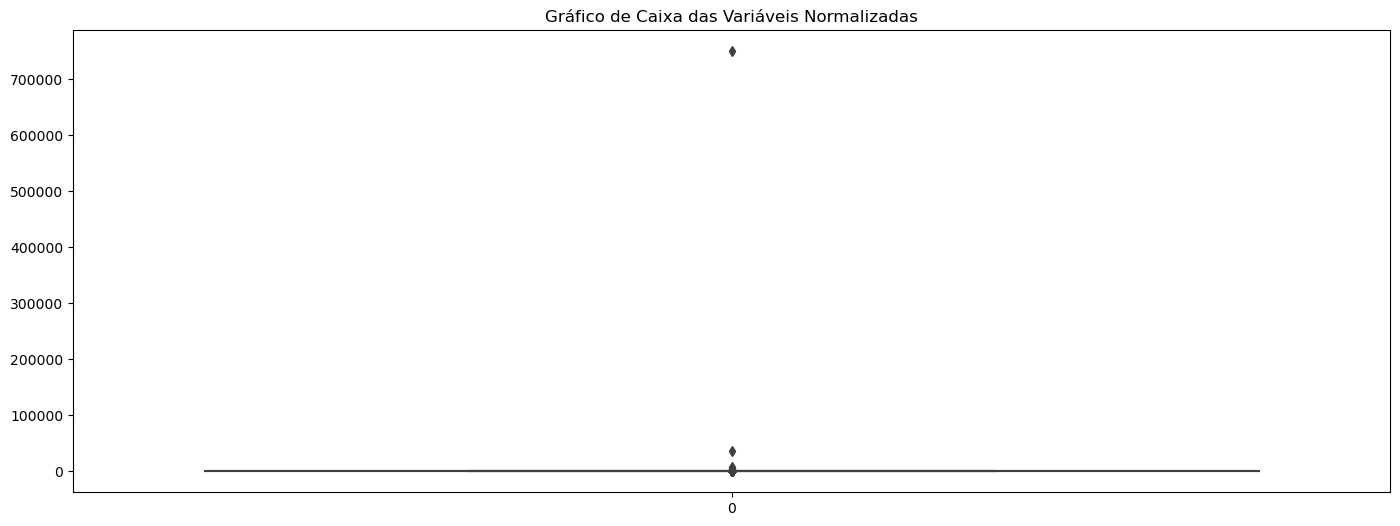

In [75]:
# Plotando o gráfico boxplot
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Área)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [76]:
# Calculando Q1 e Q3
Q1 = df['Área'].quantile(0.25)
Q3 = df['Área'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_area = Q1 - 1.5 * IQR
Limite_Superior_area = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_area, ', Limite Superior:', Limite_Superior_area )

Q1: 180.0 , Q3: 480.0
Limite Inferior: -270.0 , Limite Superior: 930.0


In [77]:
valores_acima_area = df.loc[df['Área'] > Limite_Superior_area]
valores_acima_area

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Avenida Itacira,255,Planalto Paulista,São Paulo,1000.0,4,8,6,7000000.0,False
32,Rua dos Plátanos,0,Cidade Jardim,São Paulo,1195.0,4,4,6,8700000.0,False
115,Jardim Paulista,0,Jardim Paulista,São Paulo,1060.0,5,5,4,30000000.0,False
117,Rua Prudentópolis,97,Boaçava,São Paulo,1192.0,4,3,6,6200000.0,False
173,Rua Doutor Antônio Gontijo de Carvalho,0,Jardim Cordeiro,São Paulo,1200.0,6,7,8,6360000.0,False
...,...,...,...,...,...,...,...,...,...,...
9948,Jardim Leonor,0,Jardim Leonor,São Paulo,1345.0,5,9,7,9500000.0,False
9974,Rua Albertina de Oliveira Godinho,0,Jardim Guedala,São Paulo,1300.0,5,7,6,5900000.0,False
9984,Jardim Leonor,0,Jardim Leonor,São Paulo,1345.0,5,9,7,9500000.0,False
10010,Rua Albertina de Oliveira Godinho,0,Jardim Guedala,São Paulo,1300.0,5,7,6,5900000.0,False


In [78]:
# Calculando os quartis
q1 = df['Área'].quantile(0.25)
q3 = df['Área'].quantile(0.75)

# Substituindo os valores que estão fora dos limites pelos quartis
df.loc[df['Área'] < Limite_Inferior_area, 'Área'] = q1
df.loc[df['Área'] > Limite_Superior_area, 'Área'] = q3

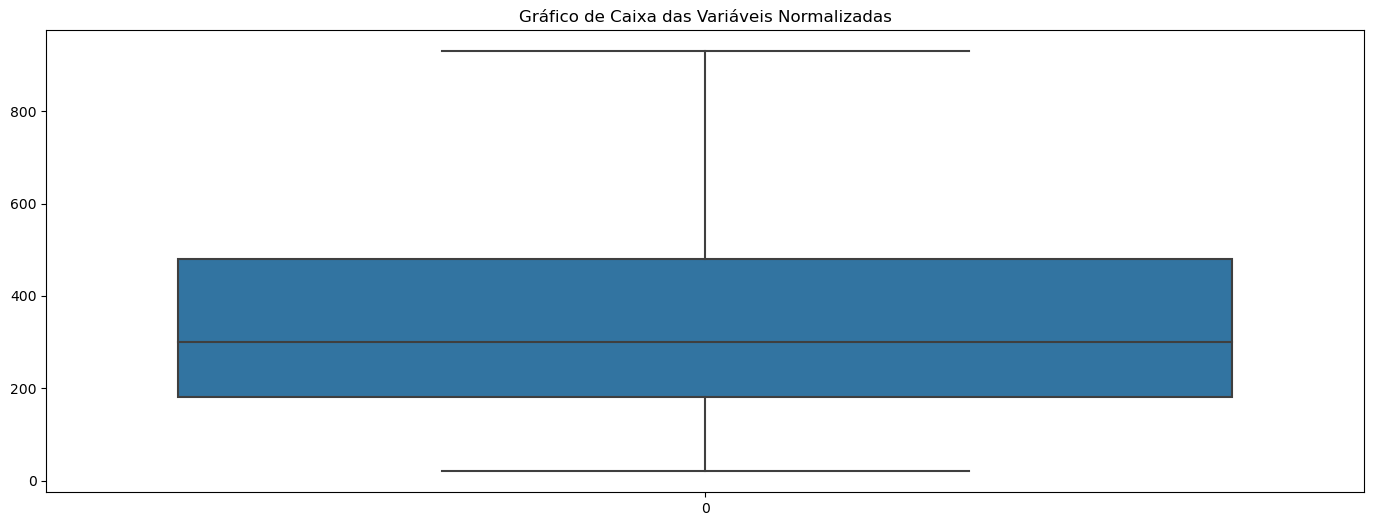

In [79]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Área)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

#### 3.3.3 Quartos

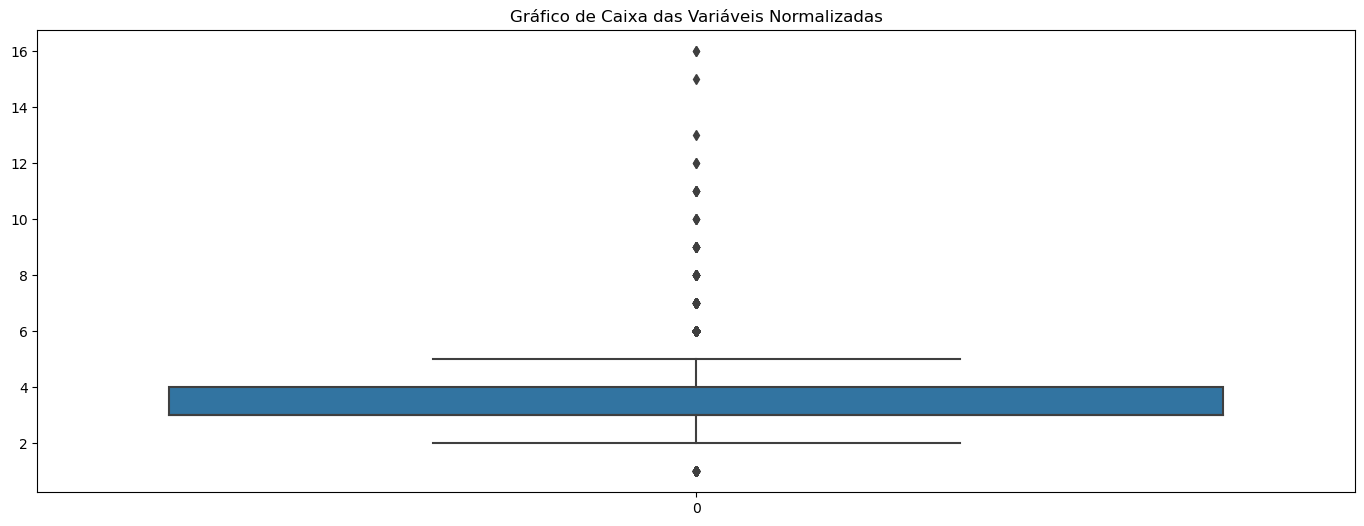

In [80]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Quartos)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [81]:
df.describe()

,Número,Área,Quartos,Banheiros,Vagas,Preço
count,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9.151000e+03
mean,41.370342,344.001475,3.524751,3.982734,4.186318,2.965833e+06
std,213.613216,195.580483,1.052094,1.996699,2.850507,3.968173e+06
min,0.000000,20.000000,1.000000,1.000000,1.000000,1.650000e+03
25%,0.000000,180.000000,3.000000,3.000000,2.000000,8.400000e+05
50%,0.000000,300.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,0.000000,480.000000,4.000000,5.000000,5.000000,3.500000e+06
max,5871.000000,930.000000,16.000000,40.000000,50.000000,6.500000e+07


In [82]:
# Calculando Q1 e Q3
Q1 = df['Quartos'].quantile(0.25)
Q3 = df['Quartos'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior, ', Limite Superior:', Limite_Superior )

Q1: 3.0 , Q3: 4.0
Limite Inferior: 1.5 , Limite Superior: 5.5


In [83]:
df_outliers_quarto = df.loc[(df['Quartos'] < Limite_Inferior) | (df['Quartos'] > Limite_Superior)]
df_outliers_quarto

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
19,Rua Graham Bell,332,Santo Amaro,São Paulo,772.0,7,7,6,2700000.0,False
120,Rua Araripe,145,Vila Califórnia,São Paulo,300.0,6,3,2,430000.0,False
173,Rua Doutor Antônio Gontijo de Carvalho,0,Jardim Cordeiro,São Paulo,480.0,6,7,8,6360000.0,False
192,Rua Quirino Pucca,0,Vila Romana,São Paulo,65.0,1,1,2,480000.0,False
203,Rua Constantino de Sousa,0,Campo Belo,São Paulo,266.0,6,6,6,1750000.0,False
...,...,...,...,...,...,...,...,...,...,...
9957,Rua Guararema,0,Bosque da Saúde,São Paulo,600.0,8,7,5,2300000.0,False
9987,Rua Eduardo Lobo,0,Parque Imperial,São Paulo,120.0,6,3,3,951000.0,False
9993,Rua Guararema,0,Bosque da Saúde,São Paulo,600.0,8,7,5,2300000.0,False
10023,Rua Eduardo Lobo,0,Parque Imperial,São Paulo,120.0,6,3,3,951000.0,False


In [84]:
# Calculando a média dos quartos
media_quartos = round(df['Quartos'].mean())

# Substituindo os valores dos quartos que estão fora dos limites pela média dos quartos
df.loc[df['Quartos'] < Limite_Inferior, 'Quartos'] = media_quartos
df.loc[df['Quartos'] > Limite_Superior, 'Quartos'] = media_quartos

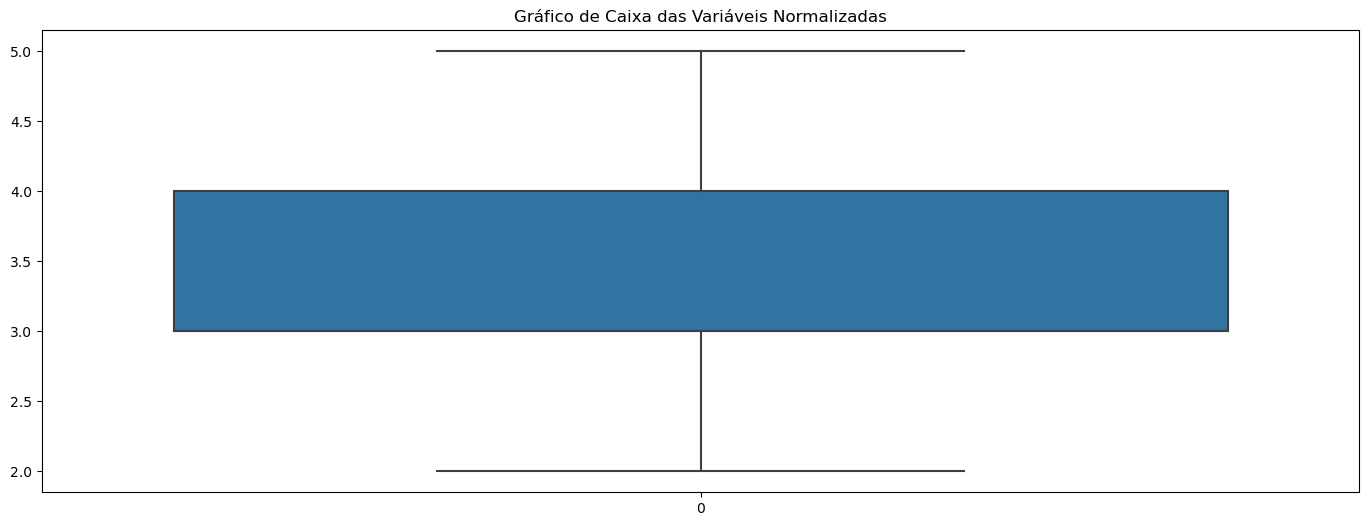

In [85]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Quartos)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [86]:
df.Quartos.value_counts()

Quartos
3    3779
4    3570
2     968
5     834
Name: count, dtype: int64

#### 3.3.4 Banheiros

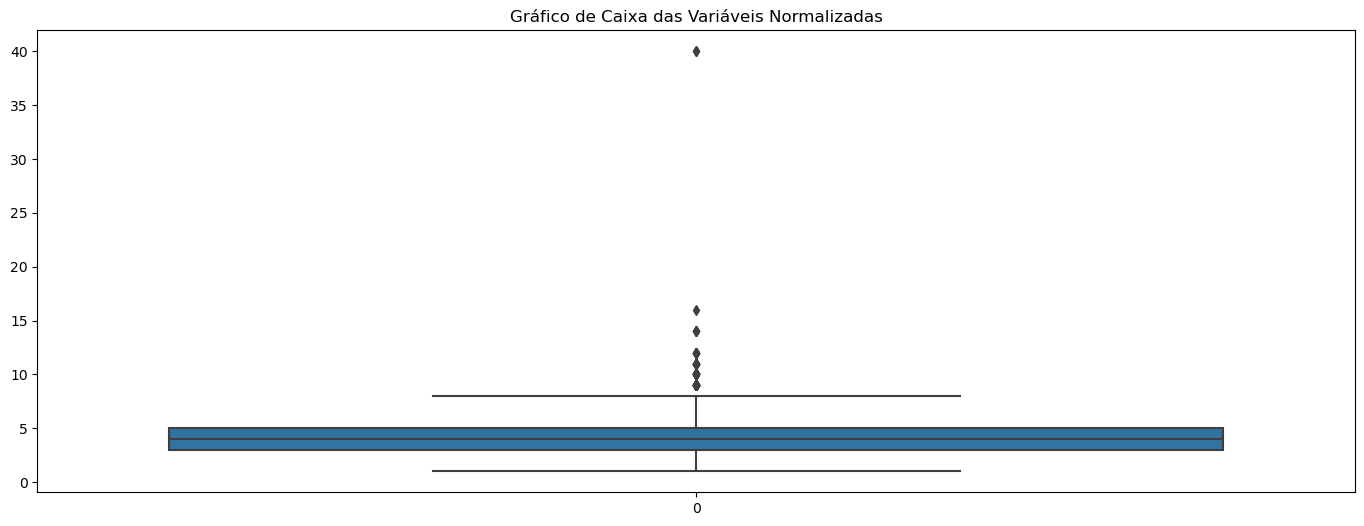

In [87]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Banheiros)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [88]:
# Calculando Q1 e Q3
Q1 = df['Banheiros'].quantile(0.25)
Q3 = df['Banheiros'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_banheiro = Q1 - 1.5 * IQR
Limite_Superior_banheiro = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_banheiro, ', Limite Superior:', Limite_Superior_banheiro )

Q1: 3.0 , Q3: 5.0
Limite Inferior: 0.0 , Limite Superior: 8.0


In [89]:
df_outliers_quarto = df.loc[(df['Banheiros'] < Limite_Inferior_banheiro) | (df['Banheiros'] > Limite_Superior_banheiro)]
df_outliers_quarto

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
41,Rua Gregório Paes de Almeida,0,Vila Madalena,São Paulo,401.0,5,9,4,3890000.0,False
623,Rua General Pereira da Cunha,0,Retiro Morumbi,São Paulo,760.0,5,10,6,12000000.0,False
639,Rua General Pereira da Cunha,0,Retiro Morumbi,São Paulo,760.0,5,10,6,12000000.0,False
685,Jardim Leonor,0,Jardim Leonor,São Paulo,684.0,5,9,8,4200000.0,False
938,Vila Madalena,0,Vila Madalena,São Paulo,507.0,5,9,4,3600000.0,False
...,...,...,...,...,...,...,...,...,...,...
9948,Jardim Leonor,0,Jardim Leonor,São Paulo,480.0,5,9,7,9500000.0,False
9964,Rua Doutor Mário Ottobrini Costa,0,Cidade Dutra,São Paulo,400.0,5,9,4,1800000.0,False
9984,Jardim Leonor,0,Jardim Leonor,São Paulo,480.0,5,9,7,9500000.0,False
10000,Rua Doutor Mário Ottobrini Costa,0,Cidade Dutra,São Paulo,400.0,5,9,4,1800000.0,False


In [90]:
# Calculando a média dos banheiros
media_banheiros = round(df['Banheiros'].mean())

# Substituindo os valores dos banheiros que estão fora dos limites pela média dos banheiros
df.loc[df['Banheiros'] < Limite_Inferior_banheiro, 'Banheiros'] = media_banheiros
df.loc[df['Banheiros'] > Limite_Superior_banheiro, 'Banheiros'] = media_banheiros

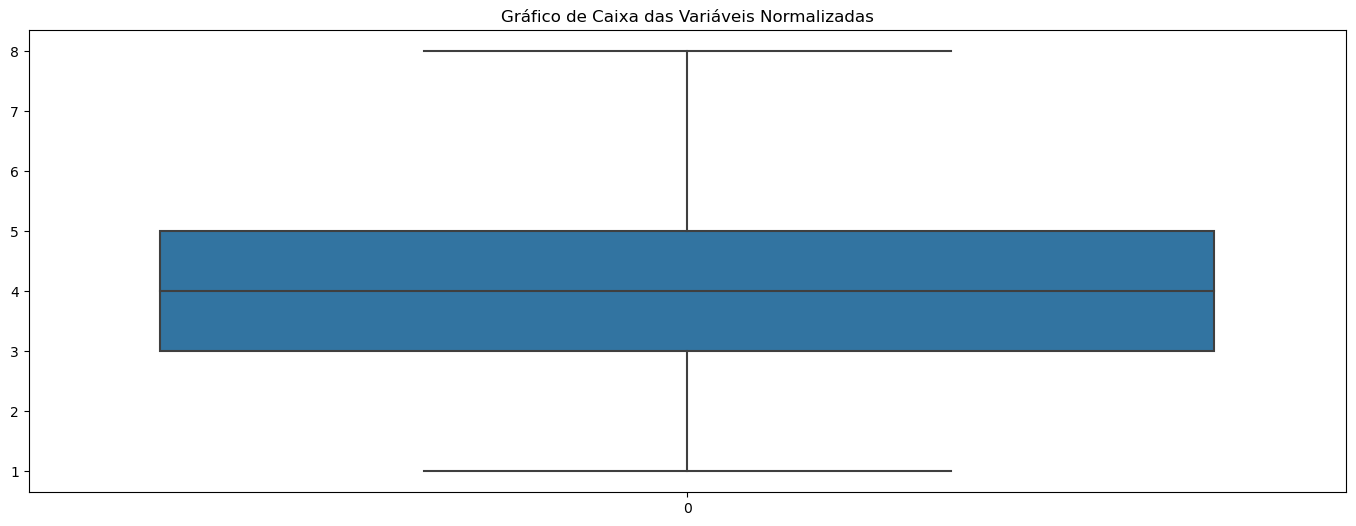

In [91]:
# Plotando gráfico de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Banheiros)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

#### 3.3.5 Vagas

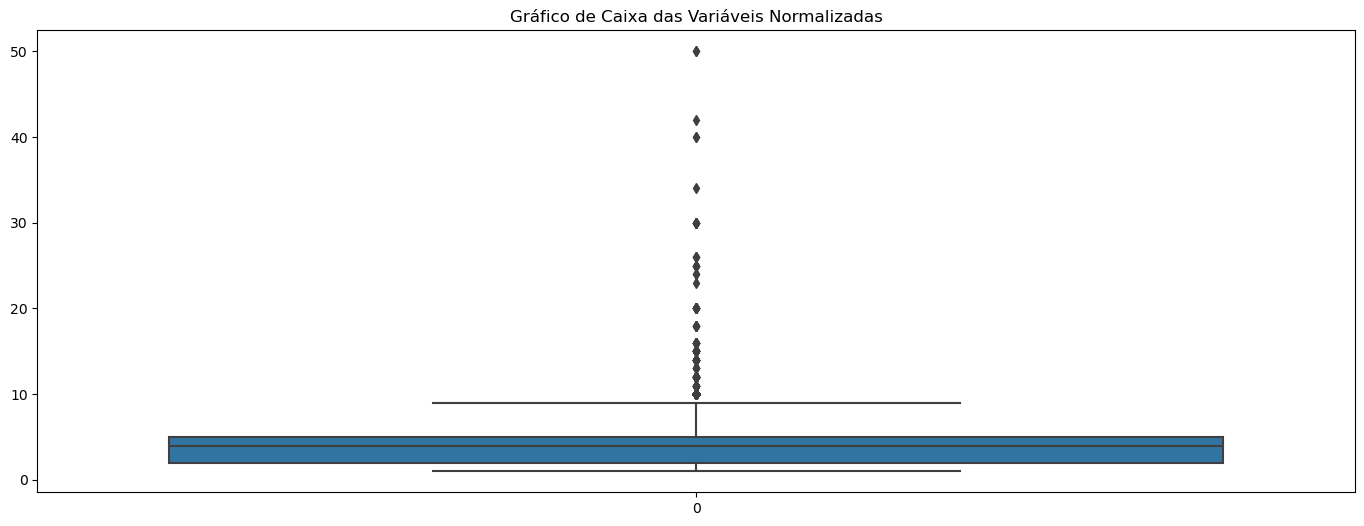

In [92]:
# Plotando gráfico de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Vagas)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [93]:
# Calculando Q1 e Q3
Q1 = df['Vagas'].quantile(0.25)
Q3 = df['Vagas'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_vagas = Q1 - 1.5 * IQR
Limite_Superior_vagas = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_vagas, ', Limite Superior:', Limite_Superior_vagas )

Q1: 2.0 , Q3: 5.0
Limite Inferior: -2.5 , Limite Superior: 9.5


In [94]:
df_outliers_vagas = df.loc[(df['Vagas'] < Limite_Inferior_vagas) | (df['Vagas'] > Limite_Superior_vagas)]
df_outliers_vagas

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
109,Rua Inglaterra,0,Jardim Europa,São Paulo,756.0,5,4,10,37000000.0,False
158,Rua Fonseca da Costa,0,Bosque da Saúde,São Paulo,650.0,4,6,12,11000.0,True
237,Rua Doutor Fausto de Almeida Prado Penteado,0,Jardim Sílvia (Zona Oeste),São Paulo,480.0,4,5,10,4500000.0,False
266,Rua Fonseca da Costa,0,Bosque da Saúde,São Paulo,650.0,4,7,12,11000.0,True
293,Rua Kansas,0,Brooklin Paulista,São Paulo,200.0,3,1,10,2240000.0,False
...,...,...,...,...,...,...,...,...,...,...
9833,Parque Edu Chaves,0,Parque Edu Chaves,São Paulo,347.0,3,2,10,899900.0,False
9837,Rua Fonseca da Costa,0,Bosque da Saúde,São Paulo,650.0,5,2,12,11000.0,True
9875,Rua Doutor Sarmento,22,Jardim Luzitânia,São Paulo,480.0,5,7,10,20000000.0,False
9893,Rua Guaonés,1,Jardim Guedala,São Paulo,480.0,4,8,10,4750000.0,False


In [95]:
# Calculando a média dos banheiros
media_vagas = round(df['Vagas'].mean())

# Substituindo os valores dos banheiros que estão fora dos limites pela média dos banheiros
df.loc[df['Vagas'] < Limite_Inferior_vagas, 'Vagas'] = media_vagas
df.loc[df['Vagas'] > Limite_Superior_vagas, 'Vagas'] = media_vagas

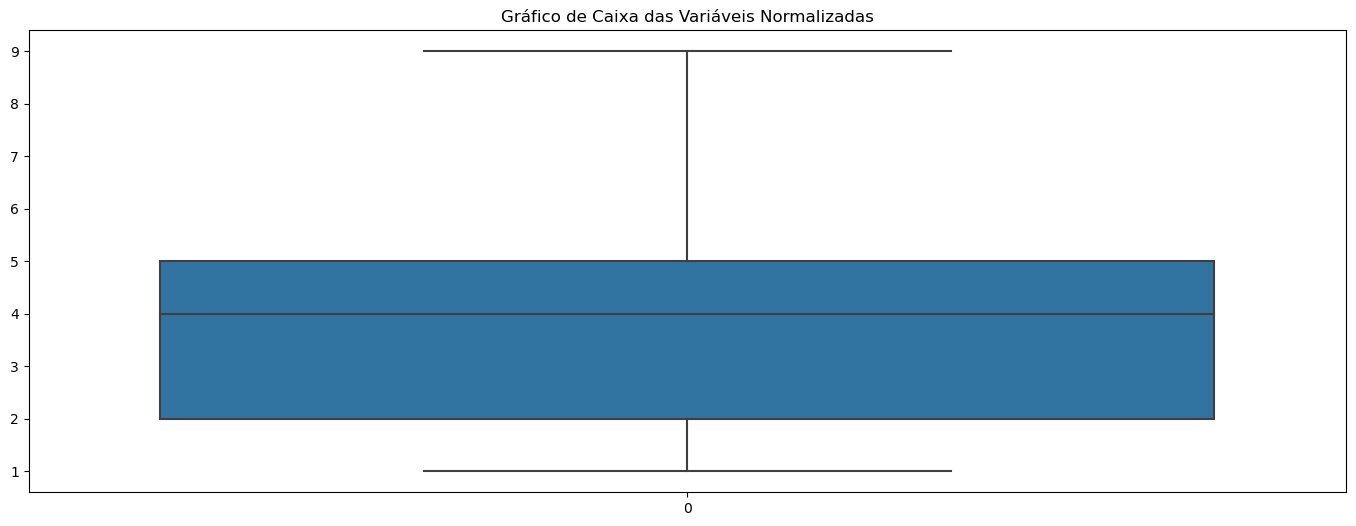

In [96]:
# Plotando gráfico de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df.Vagas)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [97]:
df.Vagas.value_counts()

Vagas
4    2470
2    2052
3    1427
6    1007
5     817
1     678
8     411
7     232
9      57
Name: count, dtype: int64

#### 3.3.6 Preço

##### 3.3.6.1 Separando em dados de compra e de aluguel

In [98]:
df = df.reset_index(drop=True)
df

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Avenida Itacira,255,Planalto Paulista,São Paulo,480.0,4,8,6,7000000.0,False
1,Rua Aurelia Perez Alvarez,42,Jardim dos Estados,São Paulo,496.5,4,4,4,3700000.0,False
2,Jardim Morumbi,0,Jardim Morumbi,São Paulo,310.0,3,2,4,685000.0,False
3,Rua Tobias Barreto,195,Mooca,São Paulo,100.0,3,2,2,540000.0,False
4,Rua Graham Bell,0,Santo Amaro,São Paulo,440.0,4,4,6,1980000.0,False
...,...,...,...,...,...,...,...,...,...,...
9146,Avenida Odila,0,Planalto Paulista,São Paulo,262.0,3,6,4,1500000.0,False
9147,Rua Guararema,0,Bosque da Saúde,São Paulo,600.0,4,7,5,2300000.0,False
9148,Rua Estero Belaco,0,Vila da Saúde,São Paulo,200.0,3,3,6,1050000.0,False
9149,Rua Manuel Onha,514,Vila Oratório,São Paulo,180.0,3,2,2,2200.0,True


In [99]:
# Dividino em df de compra e aluguel
df_compra = df.drop(df[df['Aluguel'] == True].index)

df_aluguel = df.drop(df[df['Aluguel'] == False].index)

##### 3.3.6.2 Compra

In [100]:
df_compra.reset_index(drop=True, inplace=True)
df_compra

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Avenida Itacira,255,Planalto Paulista,São Paulo,480.0,4,8,6,7000000.0,False
1,Rua Aurelia Perez Alvarez,42,Jardim dos Estados,São Paulo,496.5,4,4,4,3700000.0,False
2,Jardim Morumbi,0,Jardim Morumbi,São Paulo,310.0,3,2,4,685000.0,False
3,Rua Tobias Barreto,195,Mooca,São Paulo,100.0,3,2,2,540000.0,False
4,Rua Graham Bell,0,Santo Amaro,São Paulo,440.0,4,4,6,1980000.0,False
...,...,...,...,...,...,...,...,...,...,...
8312,Rua Pedro Teixeira,0,Vila Olímpia,São Paulo,152.0,3,2,2,960000.0,False
8313,Avenida Odila,0,Planalto Paulista,São Paulo,262.0,3,6,4,1500000.0,False
8314,Rua Guararema,0,Bosque da Saúde,São Paulo,600.0,4,7,5,2300000.0,False
8315,Rua Estero Belaco,0,Vila da Saúde,São Paulo,200.0,3,3,6,1050000.0,False


In [101]:
df_compra.Preço.value_counts()

Preço
2500000.0     181
3500000.0     172
1200000.0     160
1600000.0     141
1500000.0     137
             ... 
5490000.0       1
10300000.0      1
7600000.0       1
8599000.0       1
4043000.0       1
Name: count, Length: 865, dtype: int64

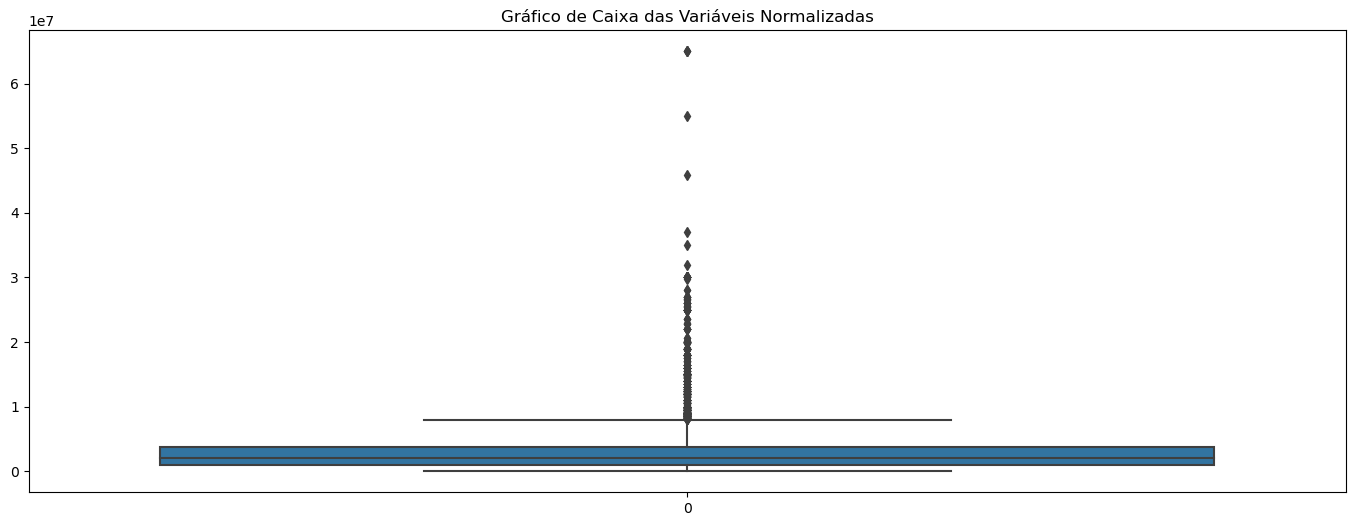

In [102]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_compra.Preço)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [103]:
# Calculando Q1 e Q3
Q1 = df_compra['Preço'].quantile(0.25)
Q3 = df_compra['Preço'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_preco_compra = Q1 - 1.5 * IQR
Limite_Superior_preco_compra = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_preco_compra, ', Limite Superior:', Limite_Superior_preco_compra )

Q1: 1000000.0 , Q3: 3800000.0
Limite Inferior: -3200000.0 , Limite Superior: 8000000.0


In [104]:
df_outliers_preco_abaixo_compra = df_compra.loc[df['Preço'] < 100000]
df_outliers_preco_abaixo_compra

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
8,Jardim Luzitânia,0,Jardim Luzitânia,São Paulo,436.0,4,3,3,15000.0,False
39,Rua Inglaterra,0,Jardim Europa,São Paulo,200.0,3,3,2,13000.0,False
113,Rua Prisciliana Duarte,250,Jardim da Saúde,São Paulo,257.0,3,4,4,1600000.0,False
117,Rua Princesa Leopoldina,0,Alto da Lapa,São Paulo,100.0,2,2,1,940000.0,False
132,Rua Serenata,0,Vila Prudente,São Paulo,140.0,3,3,2,490000.0,False
...,...,...,...,...,...,...,...,...,...,...
8203,Vila Carrão,0,Vila Carrão,São Paulo,85.0,4,2,2,720000.0,False
8264,Rua Manuel de Andrade,0,Vila Nova Mazzei,São Paulo,213.0,3,2,2,650000.0,False
8279,Rua Tapes,0,Jardim Aeroporto,São Paulo,152.0,5,7,4,840000.0,False
8303,Rua Bragança,0,Pacaembu,São Paulo,280.0,3,4,5,2450000.0,False


In [105]:
# Removendo linhas que contêm outliers
df_compra = df_compra.drop(df_outliers_preco_abaixo_compra.index)

In [106]:
verificando = df_compra.loc[df['Preço'] < 100000]
verificando

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel


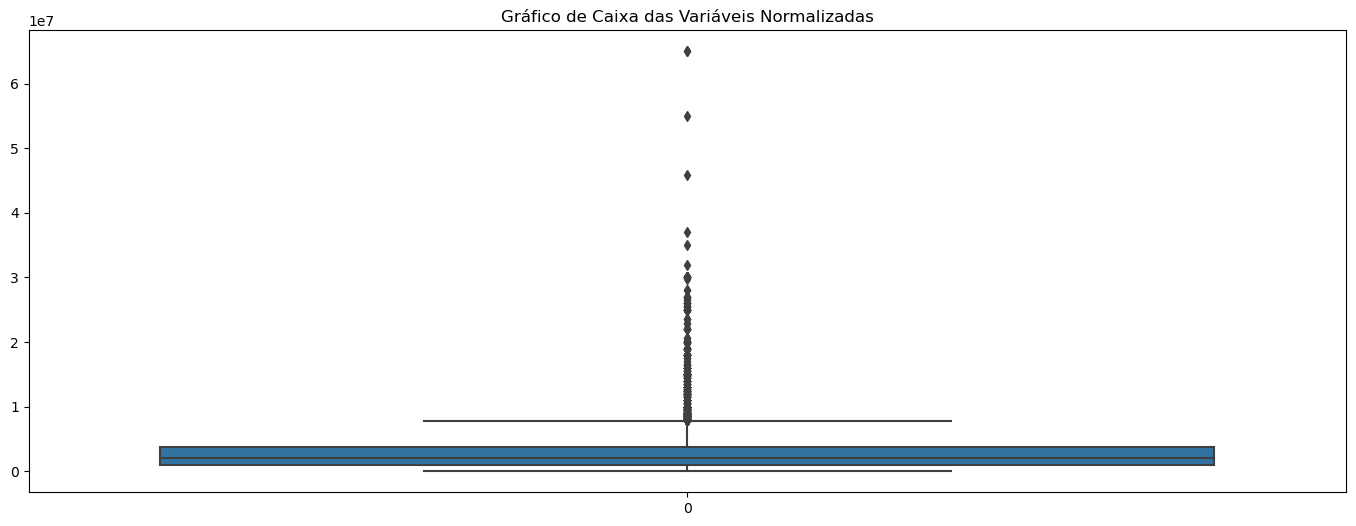

In [107]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_compra.Preço)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [108]:
# Calculando Q1 e Q3
Q1 = df_compra['Preço'].quantile(0.25)
Q3 = df_compra['Preço'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_preco_compra = Q1 - 1.5 * IQR
Limite_Superior_preco_compra = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_preco_compra, ', Limite Superior:', Limite_Superior_preco_compra )

Q1: 995000.0 , Q3: 3750000.0
Limite Inferior: -3137500.0 , Limite Superior: 7882500.0


In [109]:
valores_acima = df_compra.loc[df_compra['Preço'] > Limite_Superior_preco_compra]
valores_acima

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
22,Rua dos Plátanos,0,Cidade Jardim,São Paulo,480.0,4,4,6,8700000.0,False
44,Rua Bolívia,0,Jardim América,São Paulo,663.0,4,7,6,14500000.0,False
45,Rua General Fonseca Teles,0,Jardim Paulista,São Paulo,420.0,4,6,3,8700000.0,False
73,Rua Inglaterra,0,Jardim Europa,São Paulo,756.0,5,4,4,37000000.0,False
77,Jardim Paulista,0,Jardim Paulista,São Paulo,480.0,5,5,4,30000000.0,False
...,...,...,...,...,...,...,...,...,...,...
8249,Jardim Leonor,0,Jardim Leonor,São Paulo,480.0,5,4,7,9500000.0,False
8268,Rua Alvorada do Sul,0,Jardim Guedala,São Paulo,600.0,5,7,5,8000000.0,False
8278,Jardim Leonor,0,Jardim Leonor,São Paulo,480.0,5,4,7,9500000.0,False
8297,Rua Alvorada do Sul,0,Jardim Guedala,São Paulo,600.0,5,7,5,8000000.0,False


In [110]:
df_compra = df_compra.drop(valores_acima.index)

In [111]:
# Calculando os quartis
q1 = df_compra['Preço'].quantile(0.25)
q3 = df_compra['Preço'].quantile(0.75)

# Substituindo os valores que estão fora dos limites pelos quartis
df_compra.loc[df_compra['Preço'] < Limite_Inferior_preco_compra, 'Preço'] = q1
df_compra.loc[df_compra['Preço'] > Limite_Superior_preco_compra, 'Preço'] = q3

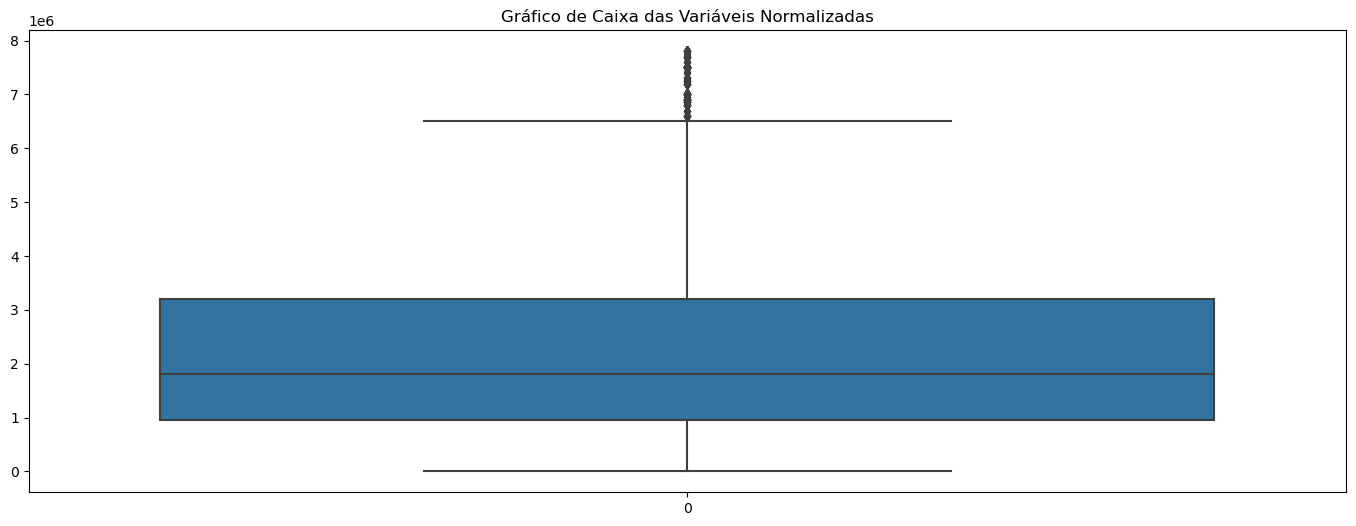

In [112]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_compra.Preço)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [113]:
# Calculando Q1 e Q3
Q1 = df_compra['Preço'].quantile(0.25)
Q3 = df_compra['Preço'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_preco_compra = Q1 - 1.5 * IQR
Limite_Superior_preco_compra = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_preco_compra, ', Limite Superior:', Limite_Superior_preco_compra )

Q1: 950000.0 , Q3: 3196250.0
Limite Inferior: -2419375.0 , Limite Superior: 6565625.0


In [114]:
valores_acima = df_compra.loc[df_compra['Preço'] > Limite_Superior_preco_compra]
valores_acima

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Avenida Itacira,255,Planalto Paulista,São Paulo,480.0,4,8,6,7000000.0,False
212,Avenida George Saville Dodd,0,Jardim Guedala,São Paulo,770.0,4,1,6,7000000.0,False
222,Jardim Guedala,0,Jardim Guedala,São Paulo,750.0,4,7,4,6900000.0,False
225,Jardim Guedala,0,Jardim Guedala,São Paulo,750.0,4,7,4,6900000.0,False
359,Rua Constantino de Sousa,0,Campo Belo,São Paulo,480.0,4,7,5,7200000.0,False
...,...,...,...,...,...,...,...,...,...,...
7805,Morumbi,0,Morumbi,São Paulo,480.0,5,6,4,7000000.0,False
7840,Rua Aristeu Seixas,0,Morumbi,São Paulo,670.0,5,2,4,7500000.0,False
8033,Rua Caraúna,0,Vila Madalena,São Paulo,632.0,4,5,5,7000000.0,False
8138,Rua Iratinga,0,Paraisópolis,São Paulo,480.0,4,6,4,7000000.0,False


In [115]:
# Calculando os quartis
q1 = df_compra['Preço'].quantile(0.25)
q3 = df_compra['Preço'].quantile(0.75)

# Substituindo os valores que estão fora dos limites pelos quartis
df_compra.loc[df_compra['Preço'] < Limite_Inferior_preco_compra, 'Preço'] = q1
df_compra.loc[df_compra['Preço'] > Limite_Superior_preco_compra, 'Preço'] = q3

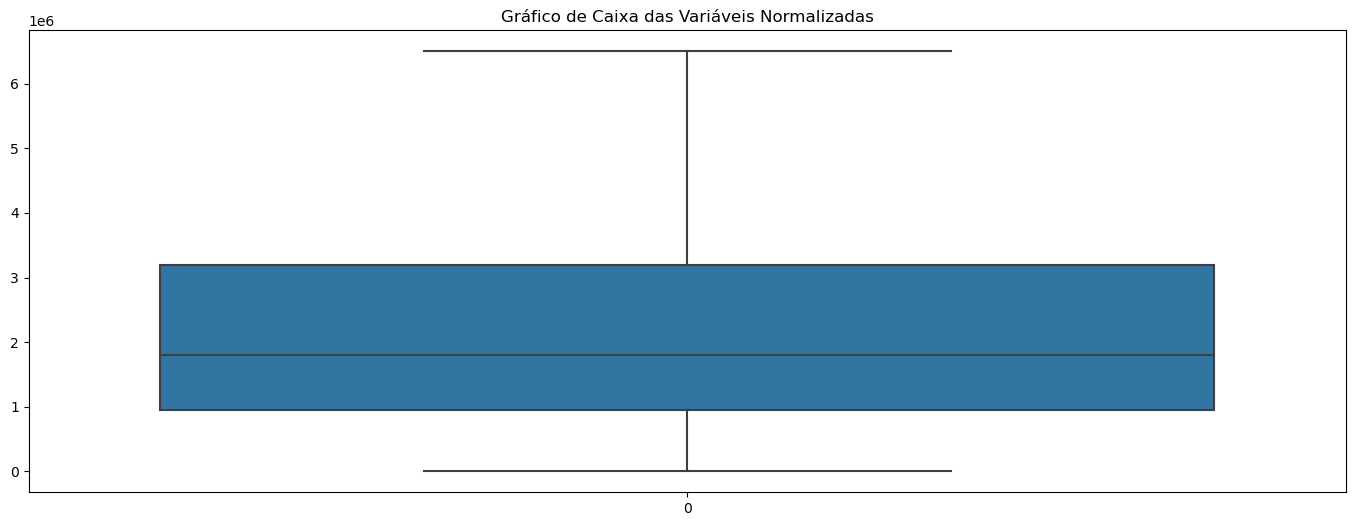

In [116]:
# Plotando gráfico de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_compra.Preço)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

##### 3.3.6.3 Aluguel

In [117]:
df_aluguel.reset_index(drop=True, inplace=True)
df_aluguel

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
0,Rua Fonseca da Costa,0,Bosque da Saúde,São Paulo,650.0,4,6,4,11000.0,True
1,Jardim Paulistano,0,Jardim Paulistano,São Paulo,230.0,2,3,2,12000.0,True
2,Rua Maestro Elias Lobo,0,Jardim Paulista,São Paulo,542.0,5,8,4,25000.0,True
3,Rua Guararapes,0,Lapa,São Paulo,515.0,3,5,8,30000.0,True
4,Rua Alvarenga,0,Butantã,São Paulo,400.0,4,3,4,10000.0,True
...,...,...,...,...,...,...,...,...,...,...
829,Rua Manuel Onha,514,Vila Oratório,São Paulo,180.0,3,2,2,2200.0,True
830,Rua Professor Henrique Neves Lefevre,617,Jardim Petrópolis,São Paulo,200.0,3,2,1,6000.0,True
831,Rua Manuel Onha,514,Vila Oratório,São Paulo,180.0,3,2,2,2200.0,True
832,Rua Professor Henrique Neves Lefevre,617,Jardim Petrópolis,São Paulo,200.0,3,2,1,6000.0,True


In [118]:
df_aluguel.Preço.value_counts()

Preço
15000.0    72
20000.0    65
10000.0    59
12000.0    51
25000.0    49
           ..
37000.0     1
22500.0     1
5420.0      1
1650.0      1
27000.0     1
Name: count, Length: 97, dtype: int64

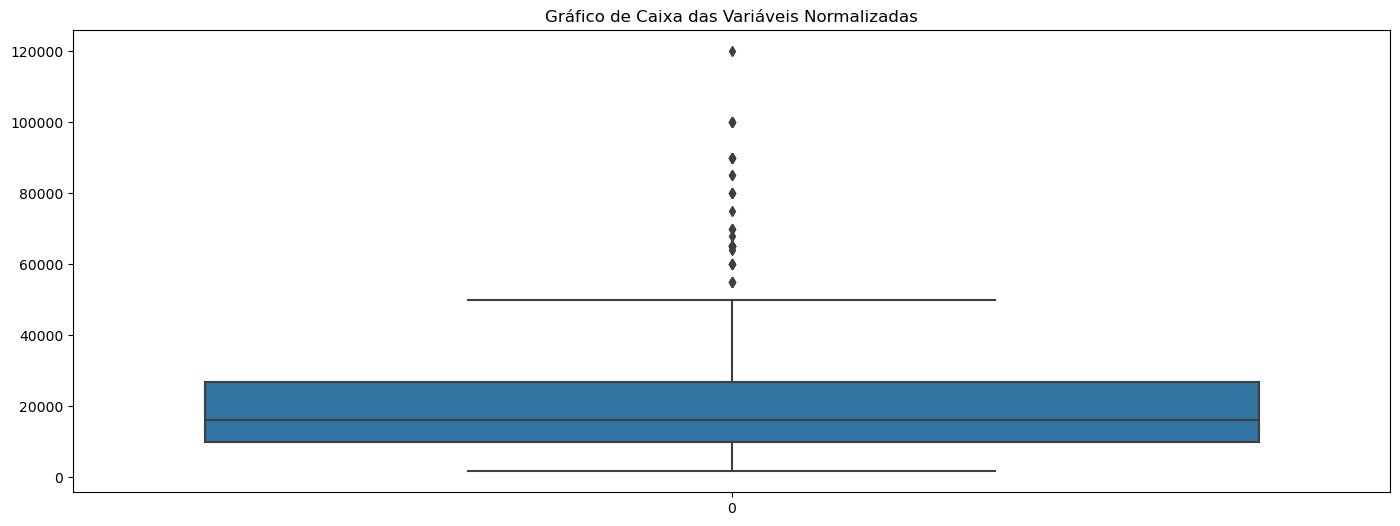

In [119]:
# Plotando gráficos de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_aluguel.Preço)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

In [120]:
# Calculando Q1 e Q3
Q1 = df_aluguel['Preço'].quantile(0.25)
Q3 = df_aluguel['Preço'].quantile(0.75)
print('Q1:', Q1, ', Q3:', Q3)

# Calculando o IQR
IQR = Q3 - Q1

# Calculando os limites do outlier
Limite_Inferior_preco_aluguel = Q1 - 1.5 * IQR
Limite_Superior_preco_aluguel = Q3 + 1.5 * IQR

print('Limite Inferior:', Limite_Inferior_preco_aluguel, ', Limite Superior:', Limite_Superior_preco_aluguel )

Q1: 10000.0 , Q3: 26750.0
Limite Inferior: -15125.0 , Limite Superior: 51875.0


In [121]:
valores_acima_aluguel = df_aluguel.loc[df_aluguel['Preço'] > Limite_Superior_preco_aluguel]
valores_acima_aluguel

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel
7,Morumbi,0,Morumbi,São Paulo,480.0,3,5,6,80000.0,True
83,Rua Marcondésia,0,Chácara Monte Alegre,São Paulo,800.0,4,6,5,65000.0,True
85,Rua Professor Luiz Oliani,0,Morumbi,São Paulo,480.0,4,4,4,60000.0,True
90,Jardim América,0,Jardim América,São Paulo,850.0,5,5,6,70000.0,True
92,Rua Argentina,0,Jardim América,São Paulo,880.0,3,5,4,65000.0,True
103,Rua Trinta e Um de Março,0,Fazenda Morumbi,São Paulo,480.0,4,5,7,60000.0,True
116,Rua Teixeira de Freitas,0,Santo Amaro,São Paulo,800.0,4,4,8,55000.0,True
167,Rua Argentina,0,Jardim América,São Paulo,880.0,4,8,8,65000.0,True
171,Rua Argentina,0,Jardim América,São Paulo,860.0,3,6,4,65000.0,True
174,Rua Argentina,0,Jardim América,São Paulo,880.0,4,8,8,65000.0,True


In [122]:
# Calculando os quartis
q1 = df_aluguel['Preço'].quantile(0.25)
q3 = df_aluguel['Preço'].quantile(0.75)

# Substituindo os valores que estão fora dos limites pelos quartis
df_aluguel.loc[df_aluguel['Preço'] < Limite_Inferior_preco_aluguel, 'Preço'] = q1
df_aluguel.loc[df_aluguel['Preço'] > Limite_Superior_preco_aluguel, 'Preço'] = q3

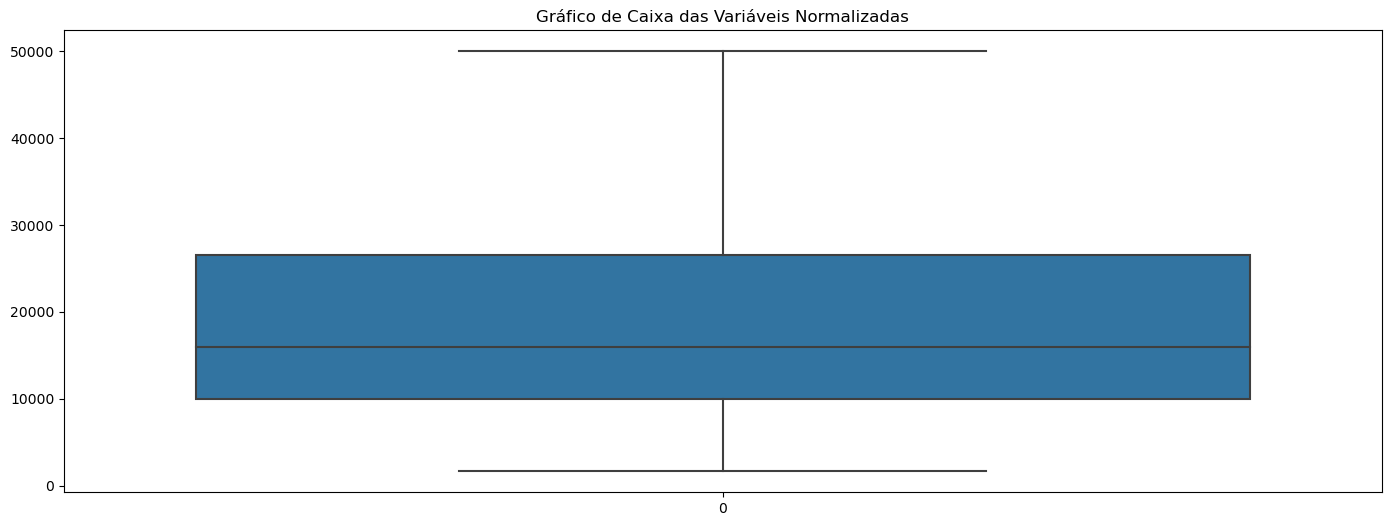

In [123]:
# Plotando gráfico de caixa das variáveis normalizadas
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_aluguel.Preço)
plt.title('Gráfico de Caixa das Variáveis Normalizadas')
plt.show()

# 4 Exploração de Dados

In [124]:
df.describe()

,Número,Área,Quartos,Banheiros,Vagas,Preço
count,9151.000000,9151.000000,9151.000000,9151.000000,9151.000000,9.151000e+03
mean,41.370342,344.001475,3.466616,3.893236,3.769533,2.965833e+06
std,213.613216,195.580483,0.801743,1.784839,1.816288,3.968173e+06
min,0.000000,20.000000,2.000000,1.000000,1.000000,1.650000e+03
25%,0.000000,180.000000,3.000000,3.000000,2.000000,8.400000e+05
50%,0.000000,300.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,0.000000,480.000000,4.000000,5.000000,5.000000,3.500000e+06
max,5871.000000,930.000000,5.000000,8.000000,9.000000,6.500000e+07


# 5 Engenharia de Recursos (Feature Engineering)

## 5.1 Importando a biblioteca

In [125]:
from sklearn.model_selection import train_test_split

## 5.2 Compra

### 5.2.1 Preparando as variáveis

In [126]:
df_bool = pd.get_dummies(df_compra[['Bairro', 'Rua']], drop_first=True)

# Adicionando as novas colunas ao DataFrame original
df_bool = pd.concat([df_compra, df_bool], axis=1)

# Removendo a coluna original dos bairros, se desejar
df_bool.drop('Bairro', axis=1, inplace=True)

In [127]:
df_bool = df_bool.dropna()

In [128]:
df_bool.head(5)

,Rua,Número,Cidade,Área,Quartos,Banheiros,Vagas,Preço,Aluguel,Bairro_Alto da Boa Vista,...,Rua_Vila Talarico,Rua_Vila Tiradentes,Rua_Vila Tramontano,Rua_Vila Vera,Rua_Vila da Saúde,Rua_Vila das Mercês,Rua_Vila do Encontro,Rua_Água Branca,Rua_Água Fria,Rua_Água Rasa
0,Avenida Itacira,255,São Paulo,480.0,4,8,6,3196250.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Rua Aurelia Perez Alvarez,42,São Paulo,496.5,4,4,4,3700000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Jardim Morumbi,0,São Paulo,310.0,3,2,4,685000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Rua Tobias Barreto,195,São Paulo,100.0,3,2,2,540000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Rua Graham Bell,0,São Paulo,440.0,4,4,6,1980000.0,False,False,...,False,False,False,False,False,False,False,False,False,False


### 5.2.2 Separando treino e teste

In [129]:
X = df_bool.drop(columns=['Rua', 'Número', 'Cidade', 'Preço', 'Aluguel'])
y = df_bool['Preço']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
X_train

,Área,Quartos,Banheiros,Vagas,Bairro_Alto da Boa Vista,Bairro_Alto da Lapa,Bairro_Alto da Mooca,Bairro_Alto de Pinheiros,Bairro_Barra Funda,Bairro_Barro Branco (Zona Norte),...,Rua_Vila Talarico,Rua_Vila Tiradentes,Rua_Vila Tramontano,Rua_Vila Vera,Rua_Vila da Saúde,Rua_Vila das Mercês,Rua_Vila do Encontro,Rua_Água Branca,Rua_Água Fria,Rua_Água Rasa
6368,156.0,3,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2661,120.0,3,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1191,510.0,4,3,5,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5547,500.0,4,7,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2380,213.0,4,6,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,90.0,4,3,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6352,350.0,3,4,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6395,309.0,2,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6585,209.0,3,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [131]:
X_test

,Área,Quartos,Banheiros,Vagas,Bairro_Alto da Boa Vista,Bairro_Alto da Lapa,Bairro_Alto da Mooca,Bairro_Alto de Pinheiros,Bairro_Barra Funda,Bairro_Barro Branco (Zona Norte),...,Rua_Vila Talarico,Rua_Vila Tiradentes,Rua_Vila Tramontano,Rua_Vila Vera,Rua_Vila da Saúde,Rua_Vila das Mercês,Rua_Vila do Encontro,Rua_Água Branca,Rua_Água Fria,Rua_Água Rasa
733,497.0,3,5,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2770,450.0,4,7,4,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7890,80.0,2,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2793,350.0,3,4,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2812,283.0,4,3,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,430.0,5,6,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3241,210.0,3,2,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8169,370.0,4,1,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4010,300.0,3,6,4,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
y_train

6368    2184000.0
2661     850000.0
1191    2800000.0
5547    5400000.0
2380    2600000.0
          ...    
4685     600000.0
6352    3900000.0
6395    2800000.0
6585    1600000.0
1060    5500000.0
Name: Preço, Length: 5523, dtype: float64

In [133]:
y_test

733     3000000.0
2770    5500000.0
7890     260000.0
2793    2000000.0
2812    1250000.0
          ...    
263     3150000.0
3241    5250000.0
8169    2000000.0
4010    3500000.0
7982    3300000.0
Name: Preço, Length: 1381, dtype: float64

## 5.3 Aluguel

### 5.3.1 Preparando as variáveis

In [134]:
df_aluguel = df_aluguel.drop(columns=['Aluguel'])
df_aluguel.head(5)

,Rua,Número,Bairro,Cidade,Área,Quartos,Banheiros,Vagas,Preço
0,Rua Fonseca da Costa,0,Bosque da Saúde,São Paulo,650.0,4,6,4,11000.0
1,Jardim Paulistano,0,Jardim Paulistano,São Paulo,230.0,2,3,2,12000.0
2,Rua Maestro Elias Lobo,0,Jardim Paulista,São Paulo,542.0,5,8,4,25000.0
3,Rua Guararapes,0,Lapa,São Paulo,515.0,3,5,8,30000.0
4,Rua Alvarenga,0,Butantã,São Paulo,400.0,4,3,4,10000.0


In [135]:
df_bool_aluguel = pd.get_dummies(df_aluguel[['Bairro', 'Rua']], drop_first=True)

# Adicionando as novas colunas ao DataFrame original
df_bool_aluguel = pd.concat([df_aluguel, df_bool_aluguel], axis=1)

# Removendo a coluna original dos bairros, se desejar
df_bool_aluguel.drop(columns=['Bairro', 'Rua', 'Cidade', 'Número'], axis=1, inplace=True)

In [136]:
# Agora 'df_encoded' contém as colunas codificadas one-hot para os bairros
df_bool_aluguel = df_bool_aluguel.dropna()

In [137]:
df_bool_aluguel.head(5)

,Área,Quartos,Banheiros,Vagas,Preço,Bairro_Alto da Lapa,Bairro_Alto de Pinheiros,Bairro_Barro Branco (Zona Norte),Bairro_Bela Aliança,Bairro_Belenzinho,...,Rua_Vila Madalena,Rua_Vila Mariana,Rua_Vila Morumbi,Rua_Vila Nova Caledônia,Rua_Vila Nova Conceição,Rua_Vila Olímpia,Rua_Vila Progredior,Rua_Vila Sônia,Rua_Vila Tramontano,Rua_Água Branca
0,650.0,4,6,4,11000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,230.0,2,3,2,12000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,542.0,5,8,4,25000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,515.0,3,5,8,30000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,400.0,4,3,4,10000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 5.3.2 Separando treino e teste

In [138]:
# Separando treino e teste:
Xa = df_bool_aluguel.drop(columns=['Preço'])
ya = df_bool_aluguel['Preço']

X_train_aluguel, X_test_aluguel, y_train_aluguel, y_test_aluguel = train_test_split(Xa, ya, test_size=0.2, random_state=42)

In [139]:
X_train_aluguel

,Área,Quartos,Banheiros,Vagas,Bairro_Alto da Lapa,Bairro_Alto de Pinheiros,Bairro_Barro Branco (Zona Norte),Bairro_Bela Aliança,Bairro_Belenzinho,Bairro_Boaçava,...,Rua_Vila Madalena,Rua_Vila Mariana,Rua_Vila Morumbi,Rua_Vila Nova Caledônia,Rua_Vila Nova Conceição,Rua_Vila Olímpia,Rua_Vila Progredior,Rua_Vila Sônia,Rua_Vila Tramontano,Rua_Água Branca
478,800.0,4,6,9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
346,554.0,4,4,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
462,742.0,5,7,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
689,558.0,4,8,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
302,450.0,4,4,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,60.0,4,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106,300.0,4,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,480.0,5,5,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
435,480.0,4,7,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
X_test_aluguel

,Área,Quartos,Banheiros,Vagas,Bairro_Alto da Lapa,Bairro_Alto de Pinheiros,Bairro_Barro Branco (Zona Norte),Bairro_Bela Aliança,Bairro_Belenzinho,Bairro_Boaçava,...,Rua_Vila Madalena,Rua_Vila Mariana,Rua_Vila Morumbi,Rua_Vila Nova Caledônia,Rua_Vila Nova Conceição,Rua_Vila Olímpia,Rua_Vila Progredior,Rua_Vila Sônia,Rua_Vila Tramontano,Rua_Água Branca
610,520.0,4,6,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
821,800.0,4,7,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
290,480.0,5,7,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799,464.0,3,4,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
168,693.0,4,6,6,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,480.0,4,4,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
652,216.0,3,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,347.0,3,5,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
776,400.0,4,4,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
y_train_aluguel

478    30000.0
346    45000.0
462    25000.0
689    22000.0
302    22000.0
        ...   
71      2100.0
106    11000.0
270    26750.0
435    25000.0
102    25000.0
Name: Preço, Length: 667, dtype: float64

In [142]:
y_test_aluguel

610    45000.0
821    15000.0
290    45000.0
799     8000.0
168    45000.0
        ...   
192    25000.0
652    13000.0
456    20000.0
776     5000.0
532    22000.0
Name: Preço, Length: 167, dtype: float64

# 6 Seleção do Modelo e métricas de avaliação

## 6.1 Importando as bibliotecas para os modelos selecionados

### Biblioteca dos Modelos

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RANSACRegressor

from sklearn.model_selection import GridSearchCV

### Bibliotecas das Métricas de avaliação

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# 7 Treinamento, Predição e Métricas dos Modelos

## 7.1 Compra

### 7.1.1 Regressão Linear

#### 7.1.1.1 Treinamento

In [145]:
# Instanciando o modelo 
lr_compra = LinearRegression()

In [146]:
# Treinando o modelo com os dados de treinamento
lr_compra.fit(X_train, y_train)

LinearRegression()

#### 7.1.1.2 Previsão

In [147]:
pred_lr_compra = lr_compra.predict(X_test)

#### 7.1.1.3 Métricas

##### Score

In [148]:
score_train_compra = lr_compra.score(X_train, y_train)
score_train_compra

0.8657618177552067

In [149]:
score_test_compra = lr_compra.score(X_test, y_test)
score_test_compra

-2.9257925893078874e+17

##### MSE

In [150]:
mse_lr_compra = mean_squared_error(y_test, pred_lr_compra)
mse_lr_compra

6.397410658337192e+29

##### R2

In [151]:
r2_score_lr_compra = r2_score(y_test, pred_lr_compra)
r2_score_lr_compra

-2.9257925893078874e+17

### 7.1.2 Florestas aleatórias

#### 7.1.2.1 Treinamento

In [152]:
# Instanciando o modelo 
rfr_compra = RandomForestRegressor()

In [153]:
# Treinando o modelo com os dados de treinamento
rfr_compra.fit(X_train, y_train)

RandomForestRegressor()

#### 7.1.2.2 Previsão

In [154]:
pred_rfr_compra = rfr_compra.predict(X_test)

#### 7.1.2.3 Métricas

##### MSE

In [155]:
mse_rfr_compra = mean_squared_error(y_test, pred_rfr_compra)
mse_rfr_compra

431456684638.0131

##### R2

In [156]:
r2_score_rfr_compra = r2_score(y_test, pred_rfr_compra)
r2_score_rfr_compra

0.8026775459730517

### 7.1.3 Gradient Boosting Regressor

#### 7.1.3.1 Treinamento

In [157]:
# Instanciando o modelo 
gbr_compra = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [158]:
# Treinando o modelo com os dados de treinamento
gbr_compra.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### 7.1.3.2 Previsão

In [159]:
pred_gbr_compra = gbr_compra.predict(X_test)

#### 7.1.3.3 Métricas

##### MSE

In [160]:
mse_gbr_compra = mean_squared_error(y_test, pred_gbr_compra)
mse_gbr_compra

645017785356.4032

##### R2

In [161]:
r2_score_gbr_compra = r2_score(y_test, pred_gbr_compra)
r2_score_gbr_compra

0.7050074855038201

### 7.1.4 Robusto

#### 7.1.4.1 Treinamento

In [162]:
# Instanciando o modelo 
ransac_compra = RANSACRegressor()

In [163]:
# Treinando o modelo com os dados de treinamento
ransac_compra.fit(X_train, y_train)

RANSACRegressor()

#### 7.1.4.2 Previsão

In [164]:
pred_ransac_compra = ransac_compra.predict(X_test)

In [165]:
pred_ransac_compra

array([3072977.84196629, 5943018.34118881,  260000.00000023, ...,
       1494485.41088207, 3012401.60686893, 1356299.15022192])

#### 7.1.4.3 Métricas

##### MSE

In [166]:
mse_ransac_compra = mean_squared_error(y_test, pred_ransac_compra)
mse_ransac_compra

601907916124.9445

##### R2

In [167]:
r2_score_ransac_compra = r2_score(y_test, pred_ransac_compra)
r2_score_ransac_compra

0.7247233584811252

## 7.2 Aluguel

### 7.2.1 Regressão Linear

#### 7.2.1.1 Treinamento

In [168]:
# Instanciando o modelo
lr_aluguel = LinearRegression()

In [169]:
# Treinando o modelo com os dados de treinamento
lr_aluguel.fit(X_train_aluguel, y_train_aluguel)

LinearRegression()

#### 7.2.1.2 Previsão

In [170]:
pred_lr_aluguel = lr_aluguel.predict(X_test_aluguel)

#### 7.2.1.3 Métricas

##### Score

In [171]:
score_train_aluguel = lr_aluguel.score(X_train_aluguel, y_train_aluguel)
score_train_aluguel

0.7633057846035156

In [172]:
score_test_aluguel = lr_aluguel.score(X_test_aluguel, y_test_aluguel)
score_test_aluguel

-5.1673014481357914e+17

##### MSE

In [173]:
mse_lr_aluguel = mean_squared_error(y_test_aluguel, pred_lr_aluguel)
mse_lr_aluguel

7.063051152066903e+25

##### R2

In [174]:
r2_score_lr_aluguel = r2_score(y_test_aluguel, pred_lr_aluguel)
r2_score_lr_aluguel

-5.1673014481357914e+17

### 7.2.2 Florestas aleatórias

#### 7.2.2.1 Treinamento

In [175]:
# Instanciando o modelo
rfr_aluguel = RandomForestRegressor()

In [176]:
# Treinando o modelo com os dados de treinamento
rfr_aluguel.fit(X_train_aluguel, y_train_aluguel)

RandomForestRegressor()

#### 7.2.2.2 Previsão

In [177]:
pred_rfr_aluguel = rfr_aluguel.predict(X_test_aluguel)

#### 7.2.2.3 Métricas

##### MSE

In [178]:
mse_rfr_aluguel = mean_squared_error(y_test_aluguel, pred_rfr_aluguel)
mse_rfr_aluguel

45530799.2009046

##### R2

In [179]:
r2_score_rfr_aluguel = r2_score(y_test_aluguel, pred_rfr_aluguel)
r2_score_rfr_aluguel

0.6668983990342964

### 7.2.3 Gradient Boosting Regressor

#### 7.2.3.1 Treinamento

In [180]:
# Instanciando o modelo
gbr_aluguel = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [181]:
# Treinando o modelo com os dados de treinamento
gbr_aluguel.fit(X_train_aluguel, y_train_aluguel)

GradientBoostingRegressor(random_state=42)

#### 7.2.3.2 Previsão

In [182]:
pred_gbr_aluguel = gbr_aluguel.predict(X_test_aluguel)

#### 7.2.3.3 Métricas

##### MSE

In [183]:
mse_gbr_aluguel = mean_squared_error(y_test_aluguel, pred_gbr_aluguel)
mse_gbr_aluguel

55343436.49990292

##### R2

In [184]:
r2_score_gbr_aluguel = r2_score(y_test_aluguel, pred_gbr_aluguel)
r2_score_gbr_aluguel

0.5951095165336971

### 7.2.4 Robusto

#### 7.2.4.1 Treinamento

In [185]:
# Instanciando o modelo
ransac_aluguel = RANSACRegressor()

In [186]:
# Treinando o modelo com os dados de treinamento
ransac_aluguel.fit(X_train_aluguel, y_train_aluguel)

RANSACRegressor()

#### 7.2.4.2 Previsão

In [187]:
pred_ransac_aluguel = ransac_aluguel.predict(X_test_aluguel)

#### 7.2.4.3 Métricas

##### MSE

In [188]:
mse_ransac_aluguel = mean_squared_error(y_test_aluguel, pred_ransac_aluguel)
mse_ransac_aluguel

1.4520650814752973e+24

##### R2

In [189]:
r2_score_ransac_aluguel = r2_score(y_test_aluguel, pred_ransac_aluguel)
r2_score_ransac_aluguel

-1.0623253090980368e+16

# 8 Avaliação dos modelos

## 8.1 Compra

In [190]:
# Criando um dicionário com os resultados
resultados = {
    "Modelo": ["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor", "RANSAC Regressor"],
    "MSE": [mse_lr_compra, mse_rfr_compra, mse_gbr_compra, mse_ransac_compra],
    "R²": [r2_score_lr_compra, r2_score_rfr_compra, r2_score_gbr_compra, r2_score_ransac_compra]
}

# Criando o DataFrame
df_resultados = pd.DataFrame(resultados)

In [191]:
df_resultados

,Modelo,MSE,R²
0,Linear Regression,6.397411e+29,-2.925793e+17
1,Random Forest Regressor,4.314567e+11,8.026775e-01
2,Gradient Boosting Regressor,6.450178e+11,7.050075e-01
3,RANSAC Regressor,6.019079e+11,7.247234e-01


In [192]:
# Identificando o melhor modelo com base no menor MSE e maior R²
melhor_modelo_mse = df_resultados.loc[df_resultados['MSE'].idxmin()]
melhor_modelo_r2 = df_resultados.loc[df_resultados['R²'].idxmax()]

In [193]:
# Comparando os modelos
print("Resultados dos modelos:")
print(df_resultados)
print("\n")

# Identificando o melhor modelo com base no menor MSE
print("Melhor modelo com base no MSE:")
print(melhor_modelo_mse)
print("\n")

# Identificando o melhor modelo com base no maior R²
print("Melhor modelo com base no R²:")
print(melhor_modelo_r2)

Resultados dos modelos:
                        Modelo           MSE            R²
0            Linear Regression  6.397411e+29 -2.925793e+17
1      Random Forest Regressor  4.314567e+11  8.026775e-01
2  Gradient Boosting Regressor  6.450178e+11  7.050075e-01
3             RANSAC Regressor  6.019079e+11  7.247234e-01


Melhor modelo com base no MSE:
Modelo    Random Forest Regressor
MSE           431456684638.013123
R²                       0.802678
Name: 1, dtype: object


Melhor modelo com base no R²:
Modelo    Random Forest Regressor
MSE           431456684638.013123
R²                       0.802678
Name: 1, dtype: object


## 8.2 Aluguel

In [194]:
# Criando um dicionário com os resultados
resultados_aluguel = {
    "Modelo": ["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor", "RANSAC Regressor"],
    "MSE": [mse_lr_aluguel, mse_rfr_aluguel, mse_gbr_aluguel, mse_ransac_aluguel],
    "R²": [r2_score_lr_aluguel, r2_score_rfr_aluguel, r2_score_gbr_aluguel, r2_score_ransac_aluguel]
}

# Criando o DataFrame
df_resultados_aluguel = pd.DataFrame(resultados_aluguel)

In [195]:
df_resultados_aluguel

,Modelo,MSE,R²
0,Linear Regression,7.063051e+25,-5.167301e+17
1,Random Forest Regressor,4.553080e+07,6.668984e-01
2,Gradient Boosting Regressor,5.534344e+07,5.951095e-01
3,RANSAC Regressor,1.452065e+24,-1.062325e+16


In [196]:
# Identificando o melhor modelo com base no menor MSE e maior R²
melhor_mse_aluguel = df_resultados_aluguel.loc[df_resultados_aluguel['MSE'].idxmin()]
melhor_r2_aluguel = df_resultados_aluguel.loc[df_resultados_aluguel['R²'].idxmax()]

In [197]:
# Comparando os modelos
print("Resultados dos modelos:")
print(df_resultados)
print("\n")

# Identificando o melhor modelo com base no menor MSE
print("Melhor modelo com base no MSE:")
print(melhor_mse_aluguel)
print("\n")

# Identificando o melhor modelo com base no maior R²
print("Melhor modelo com base no R²:")
print(melhor_r2_aluguel)

Resultados dos modelos:
                        Modelo           MSE            R²
0            Linear Regression  6.397411e+29 -2.925793e+17
1      Random Forest Regressor  4.314567e+11  8.026775e-01
2  Gradient Boosting Regressor  6.450178e+11  7.050075e-01
3             RANSAC Regressor  6.019079e+11  7.247234e-01


Melhor modelo com base no MSE:
Modelo    Random Forest Regressor
MSE               45530799.200905
R²                       0.666898
Name: 1, dtype: object


Melhor modelo com base no R²:
Modelo    Random Forest Regressor
MSE               45530799.200905
R²                       0.666898
Name: 1, dtype: object


# 9 Ajuste de Hiperparâmetros

In [236]:
from sklearn.model_selection import GridSearchCV

## 9.2 Compra

In [237]:
# Definir os modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'RANSAC Regressor': RANSACRegressor()
}

# Definir os hiperparâmetros a serem ajustados para cada modelo
params = {
    'Linear Regression': {},
    'Random Forest Regressor': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]},
    'Gradient Boosting Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'RANSAC Regressor': {'min_samples': [0.1, 0.5, 1.0]}
}

In [238]:
# Ajustar os hiperparâmetros usando GridSearchCV
results = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Fazer previsões com o melhor modelo
    y_pred = best_model.predict(X_test)
    
    # Calcular métricas de avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'Best Model': best_model, 'MSE': mse, 'R²': r2}

In [242]:
# Criar DataFrame com os resultados
df_results = pd.DataFrame(results).T
df_results

,Best Model,MSE,R²
Linear Regression,LinearRegression(),45250864546933518639166390272.0,-18886694264905976.0
Random Forest Regressor,"(DecisionTreeRegressor(max_features=1.0, rando...",506400204125.393066,0.78864
Gradient Boosting Regressor,([DecisionTreeRegressor(criterion='friedman_ms...,595575930641.208374,0.75142
RANSAC Regressor,RANSACRegressor(min_samples=0.5),32847207108646217488059596800.0,-13709686308282652.0


##### Encontrando os melhores hiperparâmetros

In [28]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [100]:
# Definir os hiperparâmetros que deseja ajustar
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árvores na floresta
    'max_depth': [None, 10, 20],      # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10]   # Número mínimo de amostras necessárias para dividir um nó
}

In [101]:
rfr_a = RandomForestRegressor()

In [102]:
grid_search_a = GridSearchCV(estimator=rfr_a, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [103]:
grid_search_a.fit(X_train_a, y_train_a)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [104]:
# Melhores hiperparâmetros encontrados
best_params_a = grid_search_a.best_params_
best_params_a

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [105]:
# Melhor score negativo do erro quadrático médio
best_score_a = grid_search_a.best_score_
print("Melhor score negativo do MSE:", best_score_a)

Melhor score negativo do MSE: -0.3411397030044284
